## Data Analysis

In [1]:
import lucem_illud

import gensim #For word2vec, etc
import requests #For downloading our datasets
import nltk #For stop words and stemmers
import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#gensim uses a couple of deprecated features
#we can't do anything about them so lets ignore them 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

Identify Chick Flick films:

In [2]:
films = pandas.read_csv('films.csv')
genre = pandas.read_csv('genre.csv')
top_billing = pandas.read_csv('top_billing.csv')

In [3]:
films = pandas.merge(films, top_billing, on='id', how='left')
films = pandas.merge(films, genre, on='id', how='left')

In [4]:
chick_flick_id = films[(films['gender'] == 2) & (films['genre'].isin(['Comedy', 'Family', 'Fantasy', 'Romance']))]['id']
chick_flick_id = list(set(chick_flick_id))
len(chick_flick_id)

1354

In [5]:
chick_flick = films[films['id'].isin(chick_flick_id)]
non_chick_flick = films[~films['id'].isin(chick_flick_id)]

In [6]:
chick_flick_dist = chick_flick.groupby('genre').count()['id'].to_frame().reset_index()
chick_flick_dist.columns = ['Genre', 'Count']
non_chick_flick_dist = non_chick_flick.groupby('genre').count()['id'].to_frame().reset_index()
non_chick_flick_dist.columns = ['Genre', 'Count']
films_dist = films.groupby('genre').count()['id'].to_frame().reset_index()
films_dist.columns = ['Genre', 'Count']

In [7]:
chick_flick_dist = pandas.merge(films_dist, chick_flick_dist, on='Genre', how='left')
non_chick_flick_dist = pandas.merge(films_dist, non_chick_flick_dist, on='Genre', how='left')

Plot of genre distribution of popular 2007 - 2017 U.S. feature films:

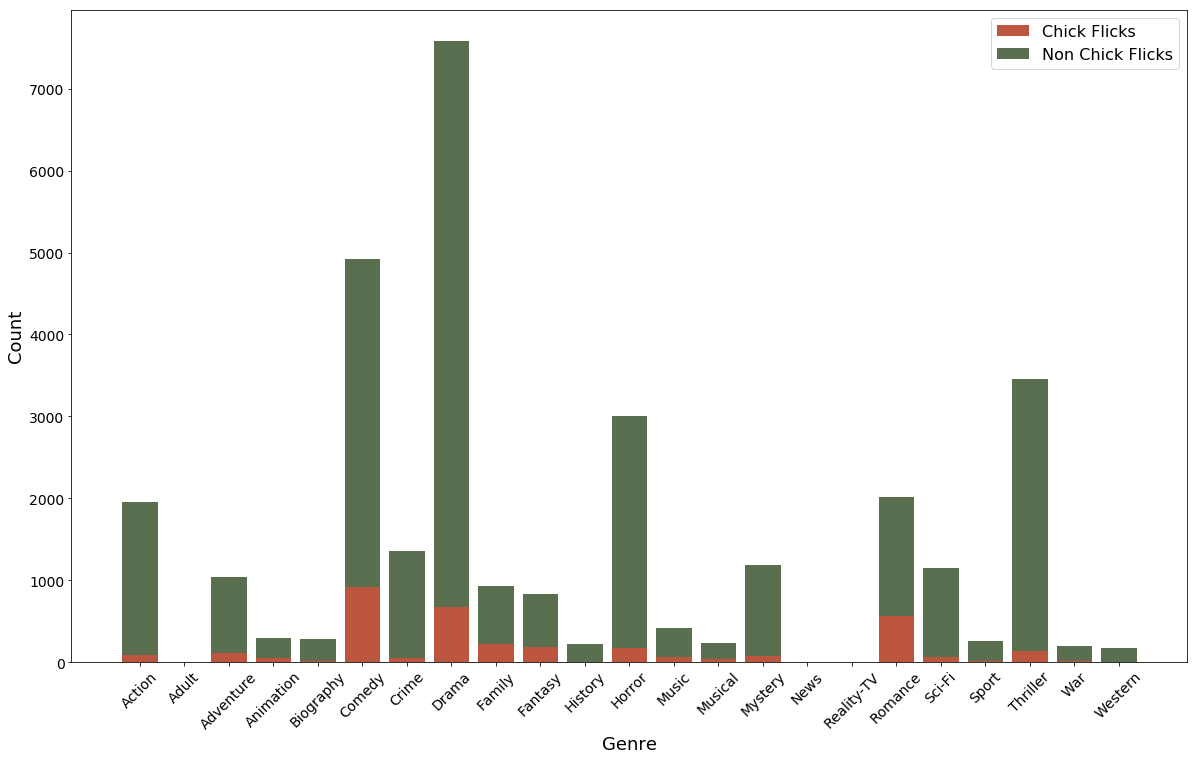

In [35]:
xlabel = films_dist['Genre']
xlabel_pos = np.arange(len(xlabel))

xdata1 = chick_flick_dist['Count_y']
xdata2 = non_chick_flick_dist['Count_y']

plt.figure(figsize=(20,12))
p1 = plt.bar(xlabel_pos, xdata1, color='#bc563e', align='center')
p2 = plt.bar(xlabel_pos, xdata2, color='#2f4b24', bottom=xdata1, align='center', alpha=0.8)
plt.xticks(xlabel_pos, xlabel, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
#plt.title('Genre Distribution of Popular 2007 - 2017 U.S. Feature Films', fontsize=20)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend((p1[0], p2[0]), ('Chick Flicks', 'Non Chick Flicks'), fontsize = 16)
plt.show()

In [24]:
films_year = pandas.read_csv('films.csv')
films_dist_year = films_year.groupby('year').count()['id'].to_frame().reset_index()
films_dist_year.columns = ['Year', 'Count']

chick_flick_year = films_year[films_year['id'].isin(chick_flick_id)]
chick_flick_dist_year = chick_flick_year.groupby('year').count()['id'].to_frame().reset_index()
chick_flick_dist_year.columns = ['Year', 'Count']

year_dist = pandas.merge(films_dist_year, chick_flick_dist_year, on='Year', how='left')

In [25]:
year_dist['Count_z'] = year_dist['Count_x'] - year_dist['Count_y']

In [26]:
year_dist

,Year,Count_x,Count_y,Count_z
0,2007,1172,87,1085
1,2008,1296,104,1192
2,2009,1615,147,1468
3,2010,1560,132,1428
4,2011,1638,134,1504
5,2012,1724,164,1560
6,2013,1770,137,1633
7,2014,1615,157,1458
8,2015,1201,124,1077
9,2016,1102,89,1013


Plot of yearly distribution of popular 2007 - 2017 U.S. feature films:

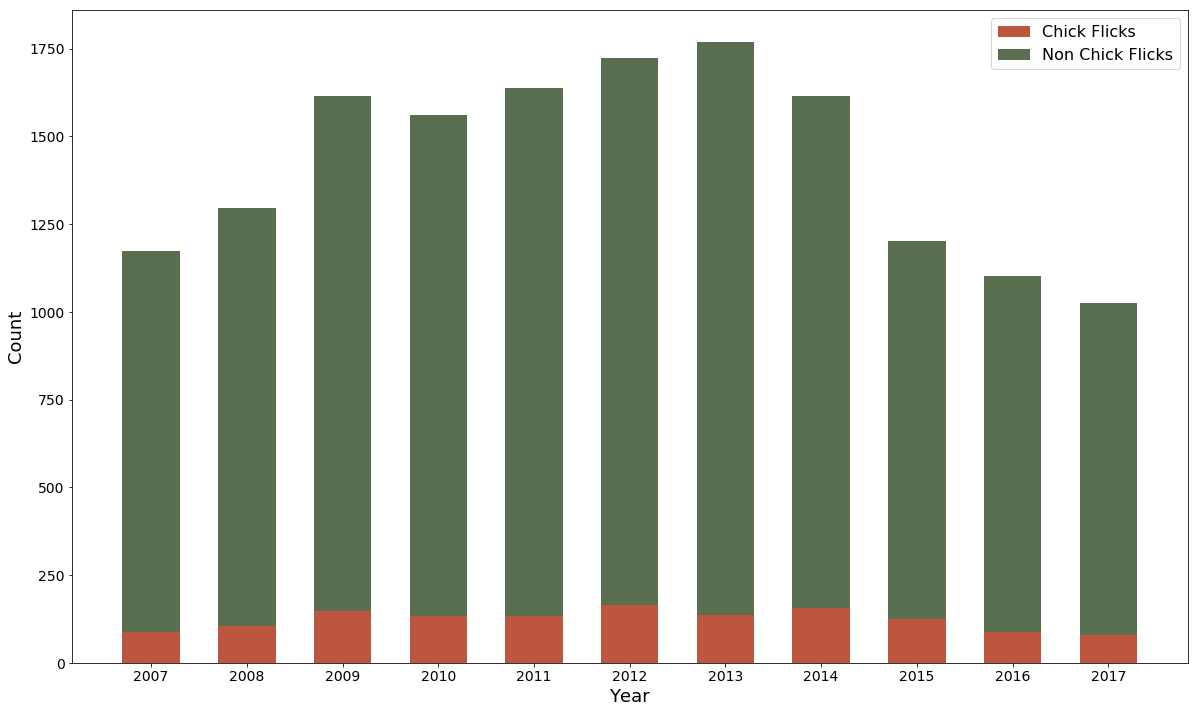

In [36]:
xlabel = year_dist['Year']
xlabel_pos = np.arange(len(xlabel))

xdata1 = year_dist['Count_y']
xdata2 = year_dist['Count_z']

plt.figure(figsize=(20,12))
p1 = plt.bar(xlabel_pos, xdata1, color='#bc563e', align='center', width = 0.6)
p2 = plt.bar(xlabel_pos, xdata2, color='#2f4b24', bottom=xdata1, align='center', alpha = 0.8, width = 0.6)
plt.xticks(xlabel_pos, xlabel, fontsize=14)
plt.yticks(fontsize=14)
#plt.title('Yearly Distribution of Popular 2007 - 2017 U.S. Feature Films', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend((p1[0], p2[0]), ('Chick Flicks', 'Non Chick Flicks'), fontsize = 16)
plt.show()

In [37]:
female_leading = films[films['gender'] == 2].id
len(set(female_leading))

3194

Replace name with women/men:

In [342]:
films_replace = pandas.read_csv('films.csv')
films_replace.loc[films_replace['id'].isin(chick_flick_id), 'chick_flick'] = 'Chick Flick'
films_replace['chick_flick'] = films_replace['chick_flick'].fillna('Non Chick Flick')
films_replace = films_replace[['tconst', 'id', 'title', 'year', 'synopsis', 'chick_flick']]

In [343]:
films_replace[:5]

,tconst,id,title,year,synopsis,chick_flick
0,tt3120962,3279442,#5,2013,#5 is a film about the creative process of mak...,Non Chick Flick
1,tt4470336,3279443,#50Fathers,2015,#50Fathers is an American Dramatic Comedy. Dom...,Non Chick Flick
2,tt6479626,3279517,#CoEdConfessions,2017,A movie that introduces the new rising stars o...,Non Chick Flick
3,tt5803530,3279540,#DigitalLivesMatter,2016,When a disgruntled fan of a social media super...,Non Chick Flick
4,tt2538204,3279686,#Lucky Number,2015,"Based on a true story, an aspiring New York Ci...",Non Chick Flick


In [344]:
films_replace['sentences'] = films_replace['synopsis'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
films_replace[:5]

,tconst,id,title,year,synopsis,chick_flick,sentences
0,tt3120962,3279442,#5,2013,#5 is a film about the creative process of mak...,Non Chick Flick,"[[#, 5, is, a, film, about, the, creative, pro..."
1,tt4470336,3279443,#50Fathers,2015,#50Fathers is an American Dramatic Comedy. Dom...,Non Chick Flick,"[[#, 50Fathers, is, an, American, Dramatic, Co..."
2,tt6479626,3279517,#CoEdConfessions,2017,A movie that introduces the new rising stars o...,Non Chick Flick,"[[A, movie, that, introduces, the, new, rising..."
3,tt5803530,3279540,#DigitalLivesMatter,2016,When a disgruntled fan of a social media super...,Non Chick Flick,"[[When, a, disgruntled, fan, of, a, social, me..."
4,tt2538204,3279686,#Lucky Number,2015,"Based on a true story, an aspiring New York Ci...",Non Chick Flick,"[[Based, on, a, true, story, ,, an, aspiring, ..."


In [345]:
films_replace['classified_sents'] = films_replace['sentences'].apply(lambda x: [nltk.pos_tag(sent) for sent in x])

In [269]:
names = set()
for i in range(len(films_replace)):
    for tagged_sentence in films_replace.loc[i, 'classified_sents']:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'PERSON':
                    names.add(' '.join([c[0] for c in chunk]))

In [297]:
from chicksexer import predict_gender

In [317]:
names = list(names)
male_names = []
female_names = []
other_names = []

In [318]:
for n in names:
    n = n.replace('_', '')
    n = n.replace('±', 't')
    n = n.replace('®', '')
    n = n.replace('ô', 'o')
    n = n.replace('*', '')
    n = n.replace('ò', 'o')
    p = predict_gender(n, return_proba=False)
    if p == 'male':
        male_names.append(n)
    elif p == 'female':
        female_names.append(n)
    else:
        other_names.append(n)

In [907]:
films_after_replace = pandas.read_csv('films.csv')
films_after_replace.loc[films_after_replace['id'].isin(chick_flick_id), 'chick_flick'] = 'Chick Flick'
films_after_replace['chick_flick'] = films_after_replace['chick_flick'].fillna('Non Chick Flick')
films_after_replace = films_after_replace[['tconst', 'id', 'title', 'year', 'synopsis', 'chick_flick']]

In [401]:
with open("male_names.txt", "w") as output:
    output.write(str(male_names))

In [402]:
with open("female_names.txt", "w") as output:
    output.write(str(female_names))

In [908]:
filter_male_names = ['He ']

not_male_names = ['Migs', 'Blue Moon', 'Saddles','Gene', 'Caviar', 'Park', 'Lockhart', 'Emmas', 'Hal', 'Could', 'Twelve',\
'Hard Justice', 'Lupus''Vittles', 'Spider Queen', 'Team X', 'Hands', 'Boy Wonder', 'Chinaman', 'Fanboy',\
'Stokes', 'Seen A Face', 'Submissive Naomi', 'Skippy Jessop', 'Driven', 'Shao Lin', 'Bravado', 'Square',\
'Grandpa', 'Dash', 'Murder Inside', 'Life Tracker Limited', 'Heroes', 'Hollywood Homicide', 'Bobbys Cut Above',\
'Viet Nam', 'Wood', 'Mutations', 'Aunt Sadie', 'Kentucky', 'Flamel', 'Old', 'Hasbro', 'Take','Lasser Glass',\
'Cafe Mnemonic','Fetch', 'Clog Buster', 'Sumter County Does', 'Town Hall', 'Rods', 'Fourth World', 'Front Page',\
'Big Ds', 'Tickle Tests', 'Bangkok', 'Angel Films', 'Life Without', 'Loverboy', 'All Movie', 'Shorty',\
'Bang Blue Light Specials', 'Chicago Children', 'Frontside Flip', 'Zombie Apocalypse', 'Film Maker',\
'Guinan Author', 'Rules', 'Cals', 'Oscar Diggs', 'Dead Sea Scroll', 'Bad Ass', 'Cam', 'Bill Himself Uncle',\
'Flat', 'Will Harris', 'Full Descriptionwhen', 'Circles', 'Scripture', 'George Washington', 'Harvard Hottie',\
'Reverend', 'Lemon', 'Aman', 'Bor', 'Enj', 'Bobo', 'Chang', 'Syracuse', 'Weapon X', 'Father Donovan O',\
'Best Diaspora Feature', 'Woods', 'Look Mrs Creeson', 'Zombie Termination Patrol', 'Festival Official Selection',\
'August Falls', 'Guy Diamond', 'Kao', 'Suicide Squad', 'Blue Light Records', 'Dares', 'Music High', 'Garbage Disposal',\
'Wise Women', 'Machine Post Match Bobby Fish Confronts Roderick Strong Post Match Post Show Recap',\
'Mother Superior', 'Fishing Naked', 'Scott Ballard Films', 'Seattle Independent Publishing', 'Green Rocky Road',\
'Road House', 'Fish', 'Delicious D', 'Court Chambers', 'Stoick', 'Screw', 'Link', 'Scream Queen', 'Cook', 'Chuckie',\
'Other Heather', 'Poseidon', 'Mobster', 'Beat Beat', 'Cap', 'Will Donner', 'Head Peacekeeper Romulus Thread',\
'Child Protective', 'Ottoman Empire', 'Locker', 'Mashed Potato Players', 'Waffle', 'Ender', 'Jealous',\
'Public Access Media', 'Rock Star', 'Doctor Blo','Stepfather', 'Will Patch', 'Socket', 'Peng Yong', 'Art Roberts',\
'Likeblood Entertainment', 'Jesus Christ Superstar', 'Aunt Lucielle', 'Cop Killer', 'Body', 'Anthony Hope',\
'Angler Island', 'Buddhism', 'Human', 'Bad All','Off Road Racing', 'Loren Himself', 'Peru', 'Pin Up Girl', 'Puck',\
'Getty Museum', 'Coach Skip', 'Martin Kove',  'Left Behind', 'Foxcatcher', 'Electric Wizard', 'Dojo Quest',\
'Flagstaff', 'Binder', 'Astarte', 'Alpha Vision Films', 'Coach', 'Cut Above', 'Vampire Boys', 'Urban Ghost Hunters',\
'Bright Eyes', 'Bad Blake', 'Cedar Lake', 'Cairo', 'Dragon Lady', 'High School', 'Hyde Park', 'Metro City',\
'Stine', 'Rob', 'Together Christmas', 'Click Five', 'Garagely', 'Bhoner', 'Thy Brother', 'Union', 'Carl Palmer',\
'Full Descriptionsomeone', 'Hamilton Fish', 'H20 Extreme', 'Sal Trafficante', 'Wood Tour', 'Hashtag', 'Stan',\
'Bundick', 'Blackberry Smoke', 'League Freshman', 'Yahu', 'Knight', 'Livingston Dell','Pittsburg High School',\
'Video', 'Matt Sanders', 'Hungry Shack', 'Harrison Green', 'Hertz', 'Michael Hall','Walter Walk',\
'David Mareks Somewhere West', 'Junior Editor', 'Master Diamond', 'True Cross',  'Titus Team', 'Blackbeard',\
'Mother Gothel', 'Mooch', 'Wolfmann', 'Bogo', 'Doctor Canter', 'Wade Porter', 'Right Wing', 'Brazilian Hip Hop Star',\
'Dirty Sunset', 'Good Guys Finish', 'Were Real Saga', 'Milgram', 'Smoky Mountains', 'Loud', 'Tomb', 'Metascore',\
'Knock', 'Her Space', 'Fine', 'Toll Road', 'Clayton Valley', 'Sound', 'Car Wash', 'Hippo', 'All My Children',\
'Punk', 'Sweets Caucasian', 'Picture Rocks National Park', 'Lost', 'Skip', 'Films', 'Fight Game', 'Hunter',\
'Doctor', 'White', 'Big Corporation', 'Ex Wife', 'Thread', 'Extremism Episode', 'Academy Award-nominee',\
'Captain Hamilton', 'Cowboy', 'Will Fishborne', 'Preschool World', 'Part', 'Reiser Wisconsin Film Festival',\
'Would Oprah Do', 'Broken Fingers', 'Hollis', 'Man Up', 'Big Blue', 'Holocaust Survivor Remembers', 'Sex Money',\
'Frost Across Australia', 'Dangerous Calling', 'Jerome City', 'Sanger International', 'Tall Faceless',\
'Agent Classified', 'Nude', 'Art Critic', 'Agents', 'Hey', 'Dog Eat Dog', 'Mother Mable', 'Case',\
'Dissociative Identity Disorder', 'Reel Films Cinema', 'Wind Instruments', 'Whip', 'Triumph', 'Mark Himself',\
'Remote', 'Bag Boy Lover Boy', 'Calendar Man', 'Scenes', 'Chop', 'Never Escape', 'Mr.', 'Half',  'Coke',\
'Buy N Large', 'Coast', 'Jump', 'Hollywood Film Festival', 'Life','Sixth Avenue', 'Zig Zag', 'Bye','Short Term',\
'Tromaville High School', 'Woman', 'Mankind', 'Mother', 'Grandpa', 'Grandma', 'Grandson', 'Kid', 'Aunt', 'Uncle',\
'Friend', 'Wife', 'Husband', 'Dad', 'Mom', 'Professor', 'Son', 'York', 'Who', 'Set', 'How', 'Boy', 'Dog', 'Cat',\
'Rat', 'Bird', 'Young', 'God', 'Hero', 'Captain', 'Sex', 'Sexual', 'Team', 'Boss', 'Women', 'Born']

for i in male_names:
    if len(i) != 1 and len(i) != 2 and i not in not_male_names:
        filter_male_names.append(i+' ')

In [909]:
filter_female_names = ['She ']
not_female_names = ['People', 'Summer', 'Story', 'Girl', 'Lady', 'Dream', 'Fantasy', 'Fan', 'lazy', 'Autumn',\
                    'Winter', 'Beauty', 'Sister', 'Heroine', 'Star']
for i in female_names:
    if i not in not_female_names:
        filter_female_names.append(i+' ')

In [910]:
films_after_replace['filtered_woman_synopsis'] = films_after_replace['synopsis'].replace(filter_female_names, 'Woman ', regex=True)
films_after_replace['filtered_woman_synopsis'] = films_after_replace['filtered_woman_synopsis'].replace([' she ', ' lady ', ' girl ', ' ladies ', ' girls '], ' woman ', regex=True)

In [911]:
films_after_replace['filtered_synopsis'] = films_after_replace['filtered_woman_synopsis'].replace(filter_male_names, 'Man ', regex=True)
films_after_replace['filtered_synopsis'] = films_after_replace['filtered_synopsis'].replace([' he ', ' guy ', ' guys ', ' gentlemen ', ' gentleman ', ' boy ', ' boys '], ' man ', regex=True)

In [912]:
films_after_replace[:5]

,tconst,id,title,year,synopsis,chick_flick,filtered_woman_synopsis,filtered_synopsis
0,tt3120962,3279442,#5,2013,#5 is a film about the creative process of mak...,Non Chick Flick,#5 is a film about the creative process of mak...,#5 is a film about the creative process of mak...
1,tt4470336,3279443,#50Fathers,2015,#50Fathers is an American Dramatic Comedy. Dom...,Non Chick Flick,#50Fathers is an American Dramatic Comedy. Wom...,#50Fathers is an American Dramatic Comedy. Wom...
2,tt6479626,3279517,#CoEdConfessions,2017,A movie that introduces the new rising stars o...,Non Chick Flick,A movie that introduces the new rising stars o...,A movie that introduces the new rising stars o...
3,tt5803530,3279540,#DigitalLivesMatter,2016,When a disgruntled fan of a social media super...,Non Chick Flick,When a disgruntled fan of a social media super...,When a disgruntled fan of a social media super...
4,tt2538204,3279686,#Lucky Number,2015,"Based on a true story, an aspiring New York Ci...",Non Chick Flick,"Based on a true story, an aspiring New York Ci...","Based on a true story, an aspiring New York Ci..."


In [914]:
films_after_replace[['tconst', 'id', 'title', 'year', 'chick_flick', 'synopsis', 'filtered_synopsis']].to_csv('films_replaced_names.csv', index=False)

Find optimal number of size and epoch:

In [73]:
films = pandas.read_csv('films_replaced_names.csv')

In [74]:
stopwords = list(set(lucem_illud.stop_words_basic) - set(['he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself']))

In [75]:
from nltk.stem.snowball import SnowballStemmer

In [76]:
films['tokenized_sents'] = films['filtered_synopsis'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
films['normalized_sents'] = films['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = stopwords, 
                                                                                           stemmer = SnowballStemmer("english")) 
                                                                            for s in x])
films[:5]

,tconst,id,title,year,chick_flick,synopsis,filtered_synopsis,tokenized_sents,normalized_sents
0,tt3120962,3279442,#5,2013,Non Chick Flick,#5 is a film about the creative process of mak...,#5 is a film about the creative process of mak...,"[[#, 5, is, a, film, about, the, creative, pro...","[[film, creativ, process, make, film], [like, ..."
1,tt4470336,3279443,#50Fathers,2015,Non Chick Flick,#50Fathers is an American Dramatic Comedy. Dom...,#50Fathers is an American Dramatic Comedy. Wom...,"[[#, 50Fathers, is, an, American, Dramatic, Co...","[[american, dramat, comedi], [woman, woman, be..."
2,tt6479626,3279517,#CoEdConfessions,2017,Non Chick Flick,A movie that introduces the new rising stars o...,A movie that introduces the new rising stars o...,"[[A, movie, that, introduces, the, new, rising...","[[movi, introduc, new, rise, star, san, man, w..."
3,tt5803530,3279540,#DigitalLivesMatter,2016,Non Chick Flick,When a disgruntled fan of a social media super...,When a disgruntled fan of a social media super...,"[[When, a, disgruntled, fan, of, a, social, me...","[[disgruntl, fan, social, media, superstar, ha..."
4,tt2538204,3279686,#Lucky Number,2015,Non Chick Flick,"Based on a true story, an aspiring New York Ci...","Based on a true story, an aspiring New York Ci...","[[Based, on, a, true, story, ,, an, aspiring, ...","[[base, true, stori, aspir, new, york, citi, s..."


In [89]:
# check optimal size
films_losses_dims = []

for d in [50,100,150,200,250,300,350,400,450,500, 550, 600, 650, 700, 750]:
    films_loss_dims = gensim.models.word2vec.Word2Vec(size = d, #dimensions
                                                      alpha=0.025,
                                                      min_count=2,
                                                      compute_loss = True,
                                                     )
    films_loss_dims.build_vocab(films['normalized_sents'].sum())
    films_loss_dims.train(films['normalized_sents'].sum(), 
                     total_examples=films_loss_dims.corpus_count, 
                     epochs=13, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )

    films_losses_dims.append(films_loss_dims.running_training_loss/(10+d*10))

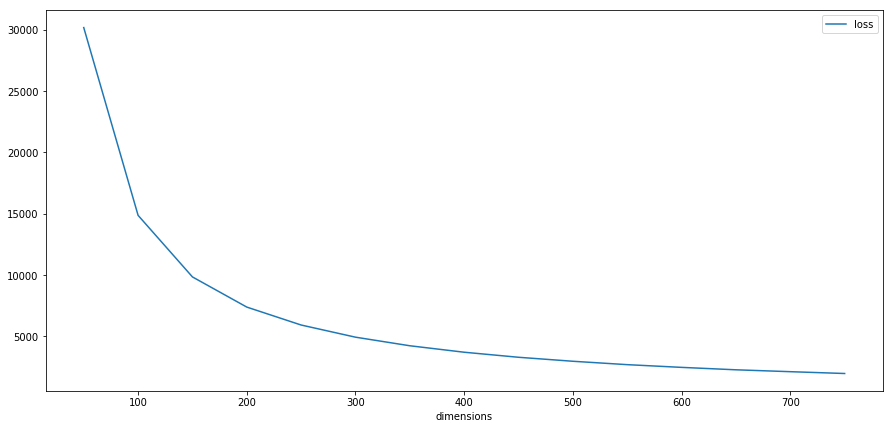

In [90]:
films_losses_dimsDF = pandas.DataFrame({'loss' : films_losses_dims, 'dimensions' : [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750]})
films_losses_dimsDF.plot(y = 'loss', x = 'dimensions', logy=False, figsize=(15, 7))
plt.show()

In [91]:
# check optimal epoch
films_loss_epochs = gensim.models.word2vec.Word2Vec(size = 500,
                                                      alpha=0.025,
                                                      min_count=2,
                                                      compute_loss = True,
                                                     )
films_loss_epochs.build_vocab(films['normalized_sents'].sum())
films_loss_epochs.train(films['normalized_sents'].sum(), 
                     total_examples=films_loss_epochs.corpus_count, 
                     epochs=1, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )
#Using a list so we can capture every epoch
films_losses_epochs = [films_loss_epochs.running_training_loss]

In [86]:
for i in range(19):
    films_loss_epochs.train(films['normalized_sents'].sum(), 
                     total_examples=films_loss_epochs.corpus_count, 
                     epochs=1,
                             )
    films_losses_epochs.append(films_loss_epochs.running_training_loss)
    print("Done epoch {}".format(i + 2), end = '\r')

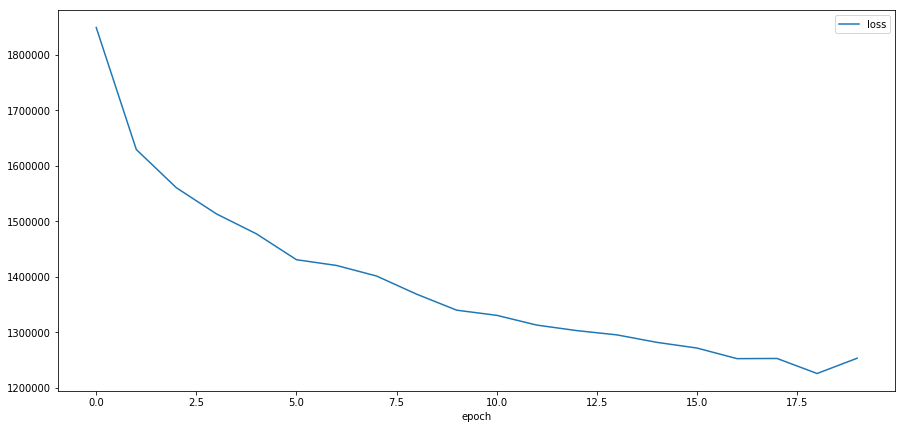

In [87]:
films_losses_epochsDF = pandas.DataFrame({'loss' : films_losses_epochs, 'epoch' : range(len(films_losses_epochs))})
films_losses_epochsDF.plot(y = 'loss', x = 'epoch', logy=False, figsize=(15, 7))
plt.show()

In [92]:
# Choose size = 350, epoch = 9 for film models

In [82]:
chick_flicks = films[films['chick_flick'] == 'Chick Flick']

In [83]:
# check optimal size
cks_losses_dims = []

for d in [50,100,150,200,250,300,350,400,450,500, 550, 600, 650, 700, 750]:
    cks_loss_dims = gensim.models.word2vec.Word2Vec(size = d, #dimensions
                                                      alpha=0.025,
                                                      min_count=2,
                                                      compute_loss = True,
                                                     )
    cks_loss_dims.build_vocab(chick_flicks['normalized_sents'].sum())
    cks_loss_dims.train(chick_flicks['normalized_sents'].sum(), 
                     total_examples=cks_loss_dims.corpus_count, 
                     epochs=10, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )

    cks_losses_dims.append(cks_loss_dims.running_training_loss/(10+d*10))

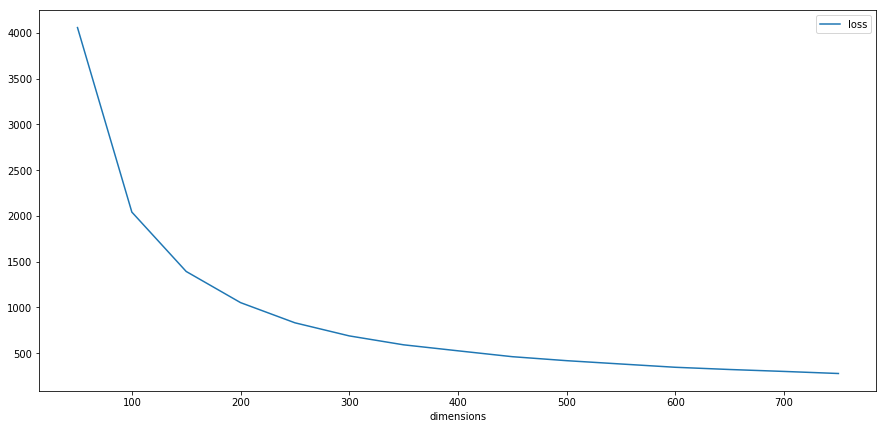

In [84]:
cks_losses_dimsDF = pandas.DataFrame({'loss' : cks_losses_dims, 'dimensions' : [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750]})
cks_losses_dimsDF.plot(y = 'loss', x = 'dimensions', logy=False, figsize=(15, 7))
plt.show()

In [93]:
# check optimal epoch
cks_loss_epochs = gensim.models.word2vec.Word2Vec(size = 250,
                                                      alpha=0.025,
                                                      min_count=2,
                                                      compute_loss = True,
                                                     )
cks_loss_epochs.build_vocab(chick_flicks['normalized_sents'].sum())
cks_loss_epochs.train(chick_flicks['normalized_sents'].sum(), 
                     total_examples=cks_loss_epochs.corpus_count, 
                     epochs=1, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )
#Using a list so we can capture every epoch
cks_losses_epochs = [cks_loss_epochs.running_training_loss]

In [94]:
for i in range(19):
    cks_loss_epochs.train(chick_flicks['normalized_sents'].sum(), 
                     total_examples=cks_loss_epochs.corpus_count, 
                     epochs=1,
                             )
    cks_losses_epochs.append(cks_loss_epochs.running_training_loss)
    print("Done epoch {}".format(i + 2), end = '\r')

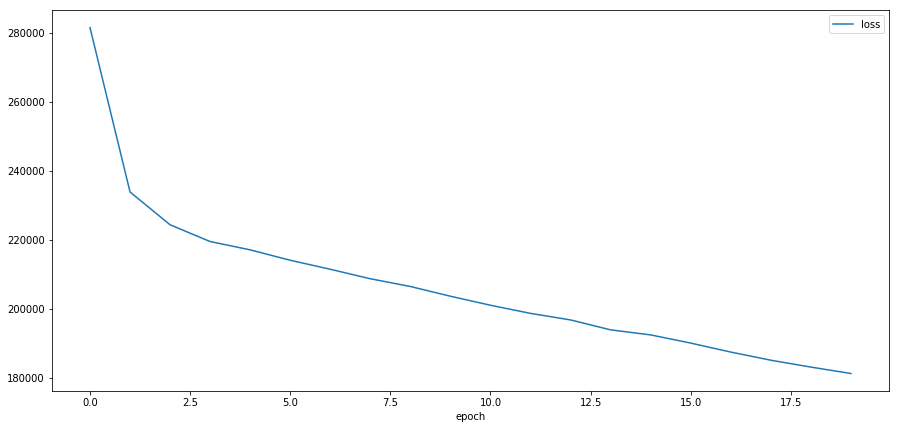

In [95]:
cks_losses_epochsDF = pandas.DataFrame({'loss' : cks_losses_epochs, 'epoch' : range(len(cks_losses_epochs))})
cks_losses_epochsDF.plot(y = 'loss', x = 'epoch', logy=False, figsize=(15, 7))
plt.show()

In [96]:
# Choose size = 250, epoch = 13 for chick flick models

In [320]:
films_2010 = films[films['year'] == 2011]

In [321]:
# check optimal size
films_2010_losses_dims = []

for d in [50,100,150,200,250,300,350,400,450,500, 550, 600, 650, 700, 750]:
    films_2010_loss_dims = gensim.models.word2vec.Word2Vec(size = d, #dimensions
                                                      alpha=0.025,
                                                      min_count=2,
                                                      compute_loss = True,
                                                     )
    films_2010_loss_dims.build_vocab(films_2010['normalized_sents'].sum())
    films_2010_loss_dims.train(films_2010['normalized_sents'].sum(), 
                     total_examples=films_2010_loss_dims.corpus_count, 
                     epochs=10, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )

    films_2010_losses_dims.append(films_2010_loss_dims.running_training_loss/(10+d*10))

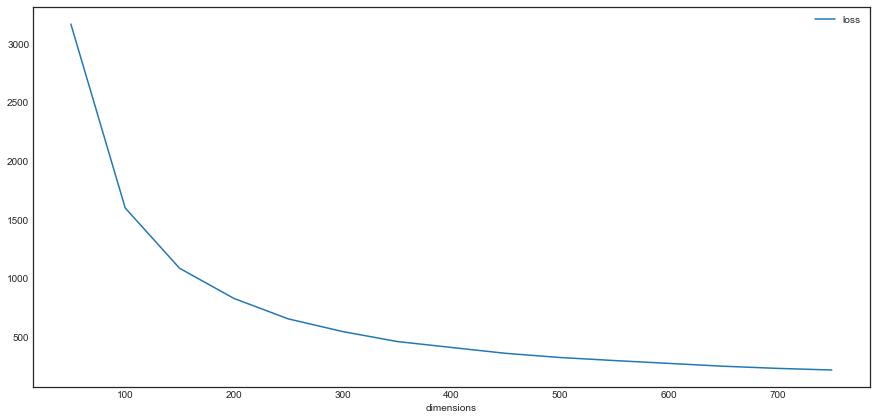

In [322]:
films_2010_losses_dimsDF = pandas.DataFrame({'loss' : films_2010_losses_dims, 'dimensions' : [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750]})
films_2010_losses_dimsDF.plot(y = 'loss', x = 'dimensions', logy=False, figsize=(15, 7))
plt.show()

In [323]:
# check optimal epoch
films_2010_loss_epochs = gensim.models.word2vec.Word2Vec(size = 300,
                                                      alpha=0.025,
                                                      min_count=2,
                                                      compute_loss = True,
                                                     )
films_2010_loss_epochs.build_vocab(films_2010['normalized_sents'].sum())
films_2010_loss_epochs.train(films_2010['normalized_sents'].sum(), 
                     total_examples=films_2010_loss_epochs.corpus_count, 
                     epochs=1, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )
#Using a list so we can capture every epoch
films_2010_losses_epochs = [films_2010_loss_epochs.running_training_loss]

In [324]:
for i in range(19):
    films_2010_loss_epochs.train(films_2010['normalized_sents'].sum(), 
                     total_examples=films_2010_loss_epochs.corpus_count, 
                     epochs=1,
                             )
    films_2010_losses_epochs.append(films_2010_loss_epochs.running_training_loss)
    print("Done epoch {}".format(i + 2), end = '\r')

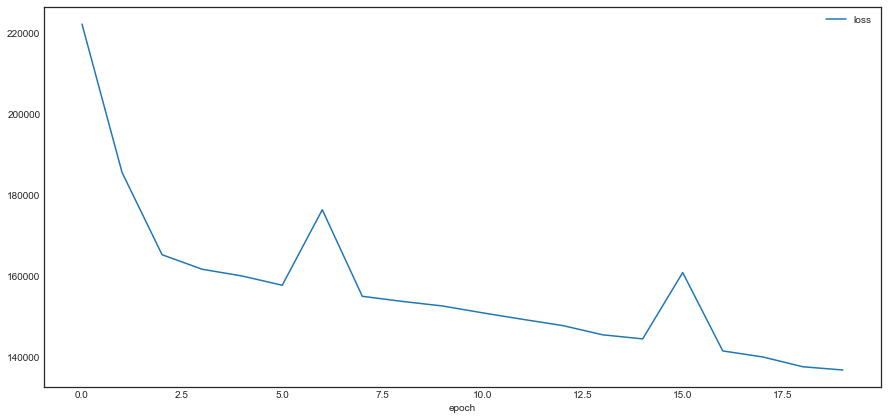

In [325]:
films_2010_losses_epochsDF = pandas.DataFrame({'loss' : films_2010_losses_epochs, 'epoch' : range(len(films_2010_losses_epochs))})
films_2010_losses_epochsDF.plot(y = 'loss', x = 'epoch', logy=False, figsize=(15, 7))
plt.show()

In [326]:
# Choose size = 300, epoch = 9 for each year film models

In [333]:
cks_2010 = chick_flicks[chick_flicks['year'] == 2013]

In [334]:
# check optimal size
cks_2010_losses_dims = []

for d in [50,100,150,200,250,300,350,400,450,500, 550, 600, 650, 700, 750]:
    cks_2010_loss_dims = gensim.models.word2vec.Word2Vec(size = d, #dimensions
                                                      alpha=0.025,
                                                      min_count=2,
                                                      compute_loss = True,
                                                     )
    cks_2010_loss_dims.build_vocab(cks_2010['normalized_sents'].sum())
    cks_2010_loss_dims.train(cks_2010['normalized_sents'].sum(), 
                     total_examples=cks_2010_loss_dims.corpus_count, 
                     epochs=10, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )

    cks_2010_losses_dims.append(cks_2010_loss_dims.running_training_loss/(10+d*10))

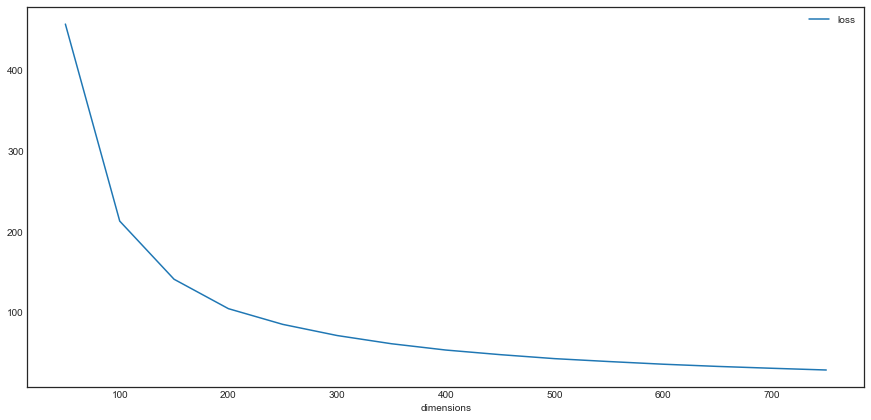

In [335]:
cks_2010_losses_dimsDF = pandas.DataFrame({'loss' : cks_2010_losses_dims, 'dimensions' : [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750]})
cks_2010_losses_dimsDF.plot(y = 'loss', x = 'dimensions', logy=False, figsize=(15, 7))
plt.show()

In [336]:
# check optimal epoch
cks_2010_loss_epochs = gensim.models.word2vec.Word2Vec(size = 250,
                                                      alpha=0.025,
                                                      min_count=2,
                                                      compute_loss = True,
                                                     )
cks_2010_loss_epochs.build_vocab(cks_2010['normalized_sents'].sum())
cks_2010_loss_epochs.train(cks_2010['normalized_sents'].sum(), 
                     total_examples=cks_2010_loss_epochs.corpus_count, 
                     epochs=1, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )
#Using a list so we can capture every epoch
cks_2010_losses_epochs = [cks_2010_loss_epochs.running_training_loss]

In [337]:
for i in range(19):
    cks_2010_loss_epochs.train(cks_2010['normalized_sents'].sum(), 
                     total_examples=cks_2010_loss_epochs.corpus_count, 
                     epochs=1,
                             )
    cks_2010_losses_epochs.append(cks_2010_loss_epochs.running_training_loss)
    print("Done epoch {}".format(i + 2), end = '\r')

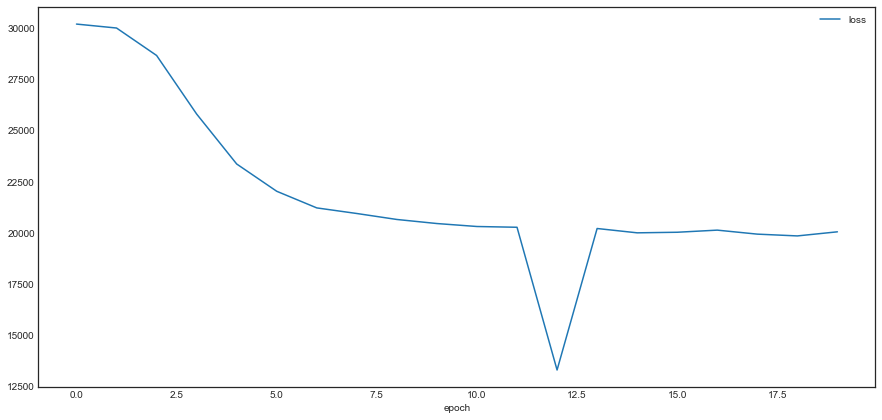

In [338]:
cks_2010_losses_epochsDF = pandas.DataFrame({'loss' : cks_2010_losses_epochs, 'epoch' : range(len(cks_2010_losses_epochs))})
cks_2010_losses_epochsDF.plot(y = 'loss', x = 'epoch', logy=False, figsize=(15, 7))
plt.show()

In [339]:
# Choose size = 250, epoch = 6 for each year chick flick models

In [98]:
del films_loss_epochs
del cks_loss_epochs
del films_loss_dims
del cks_loss_dims

In [341]:
del films_2010_loss_dims
del films_2010_loss_epochs
del cks_2010_loss_dims
del cks_2010_loss_epochs

Doc2Vec:

In [99]:
films['tokenized_words'] = films['filtered_synopsis'].apply(lambda x: nltk.word_tokenize(x))
films['normalized_words'] = films['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = stopwords, stemmer = SnowballStemmer("english")))

In [100]:
films[:5]

,tconst,id,title,year,chick_flick,synopsis,filtered_synopsis,tokenized_sents,normalized_sents,tokenized_words,normalized_words
0,tt3120962,3279442,#5,2013,Non Chick Flick,#5 is a film about the creative process of mak...,#5 is a film about the creative process of mak...,"[[#, 5, is, a, film, about, the, creative, pro...","[[film, creativ, process, make, film], [like, ...","[#, 5, is, a, film, about, the, creative, proc...","[film, creativ, process, make, film, like, gre..."
1,tt4470336,3279443,#50Fathers,2015,Non Chick Flick,#50Fathers is an American Dramatic Comedy. Dom...,#50Fathers is an American Dramatic Comedy. Wom...,"[[#, 50Fathers, is, an, American, Dramatic, Co...","[[american, dramat, comedi], [woman, woman, be...","[#, 50Fathers, is, an, American, Dramatic, Com...","[american, dramat, comedi, woman, woman, best,..."
2,tt6479626,3279517,#CoEdConfessions,2017,Non Chick Flick,A movie that introduces the new rising stars o...,A movie that introduces the new rising stars o...,"[[A, movie, that, introduces, the, new, rising...","[[movi, introduc, new, rise, star, san, man, w...","[A, movie, that, introduces, the, new, rising,...","[movi, introduc, new, rise, star, san, man, wo..."
3,tt5803530,3279540,#DigitalLivesMatter,2016,Non Chick Flick,When a disgruntled fan of a social media super...,When a disgruntled fan of a social media super...,"[[When, a, disgruntled, fan, of, a, social, me...","[[disgruntl, fan, social, media, superstar, ha...","[When, a, disgruntled, fan, of, a, social, med...","[disgruntl, fan, social, media, superstar, hac..."
4,tt2538204,3279686,#Lucky Number,2015,Non Chick Flick,"Based on a true story, an aspiring New York Ci...","Based on a true story, an aspiring New York Ci...","[[Based, on, a, true, story, ,, an, aspiring, ...","[[base, true, stori, aspir, new, york, citi, s...","[Based, on, a, true, story, ,, an, aspiring, N...","[base, true, stori, aspir, new, york, citi, sp..."


In [101]:
taggedDocs = []
for index, row in films.iterrows():
    docKeywords = [row['title']]
    docKeywords.append(row['year'])
    docKeywords.append(row['chick_flick'])
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
films['TaggedSynopsis'] = taggedDocs

In [102]:
films.iloc[50]['synopsis']

"WWE Wrestler Randy Orton portrays Nick Malloy, an Emergency Medical Technician (EMT) who finds himself caught in a deadly 12-round game of cat and mouse with a vigilante tied to the paramedic's past. With little time to spare and his wife's life hanging in the balance, the EMT must figure out why he's been chosen to be the pawn in this maniac's game before it's too late."

In [103]:
films.iloc[50]['TaggedSynopsis']

LabeledSentence(words=['wwe', 'man', 'portray', 'man', 'malloy', 'emerg', 'medic', 'technician', 'emt', 'find', 'himself', 'caught', 'dead', 'game', 'cat', 'mous', 'vigilant', 'tie', 'paramed', 'past', 'littl', 'time', 'spare', 'his', 'wife', 'life', 'hang', 'balanc', 'emt', 'must', 'figur', 'whi', 'he', 'chosen', 'pawn', 'maniac', 'game', 'befor', 'late'], tags=['12 Rounds 2: Reloaded', 2013, 'Non Chick Flick'])

In [135]:
films.to_csv('tokenized_films.csv', index=False)

In [104]:
filmD2V = gensim.models.doc2vec.Doc2Vec(size=350, alpha=0.025, min_alpha=0.025, min_count=2) 
filmD2V.build_vocab(films['TaggedSynopsis'])
for epoch in range(9):
    filmD2V.train(films['TaggedSynopsis'], total_examples=filmD2V.corpus_count, epochs = 1)
    filmD2V.alpha -= 0.002 # decrease the learning rate
    filmD2V.min_alpha = filmD2V.alpha # fix the learning rate, no decay

In [160]:
filmD2V.save('trained_models/filmD2V.mm')

In [105]:
chick_flicks = films[films['chick_flick'] == 'Chick Flick']

In [108]:
chick_flickD2V = gensim.models.doc2vec.Doc2Vec(size=250, alpha=0.025, min_alpha=0.025, min_count=2) 
chick_flickD2V.build_vocab(chick_flicks['TaggedSynopsis'])
for epoch in range(13):
    chick_flickD2V.train(chick_flicks['TaggedSynopsis'], total_examples=chick_flickD2V.corpus_count, epochs = 1)
    chick_flickD2V.alpha -= 0.002 # decrease the learning rate
    chick_flickD2V.min_alpha = chick_flickD2V.alpha # fix the learning rate, no decay

In [161]:
chick_flickD2V.save('trained_models/chick_flickD2V.mm')

In [214]:
filmD2V = gensim.models.doc2vec.Doc2Vec.load('trained_models/filmD2V.mm')
chick_flickD2V = gensim.models.doc2vec.Doc2Vec.load('trained_models/chick_flickD2V.mm')

In [215]:
# A function to plot the heatmap of documents against documents/words
def plot_heatmap(target1, target2, modelD2V):
    heatmapMatrix = []
    for tagOuter in target1:
        column = []
        tagVec = modelD2V.docvecs[tagOuter].reshape(1, -1)
        for tagInner in target2:
            column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, modelD2V.docvecs[tagInner].reshape(1, -1))[0][0])
        heatmapMatrix.append(column)
    heatmapMatrix = np.array(heatmapMatrix)
    
    seaborn.set_style("white")

    fig, ax = plt.subplots(figsize = (10, 7), dpi=200)
    #hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
    #hmap = ax.pcolor(heatmapMatrix)
    #cbar = plt.colorbar(hmap)

    seaborn.heatmap(heatmapMatrix, ax=ax)
    a = ax.invert_yaxis()
    
    #cbar.set_label('cosine similarity', rotation=270)
    a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
    a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

    #a = ax.set_xticklabels(target2, minor=False, rotation=270)
    a = ax.set_xticklabels(target2, minor=False)
    #a = ax.set_yticklabels(target1, minor=False)
    a = ax.set_yticklabels(target1, minor=False, rotation=360)

In [216]:
# A function to plot the heatmap of documents against documents/words
# Vertical label
def plot_heatmap_v(target1, target2, modelD2V, vmin, vmax):
    heatmapMatrix = []
    for tagOuter in target1:
        column = []
        tagVec = modelD2V.docvecs[tagOuter].reshape(1, -1)
        for tagInner in target2:
            column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, modelD2V.docvecs[tagInner].reshape(1, -1))[0][0])
        heatmapMatrix.append(column)
    heatmapMatrix = np.array(heatmapMatrix)
        
    mask = np.zeros_like(heatmapMatrix)
    mask[np.tril_indices_from(mask)] = True

    seaborn.set_style("white")
    #seaborn.set()

    fig, ax = plt.subplots(figsize = (10, 7), dpi=200)
    #hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
    #hmap = ax.pcolor(heatmapMatrix)
    #cbar = plt.colorbar(hmap)

    seaborn.heatmap(heatmapMatrix, mask=mask, vmin=vmin, vmax=vmax, ax=ax)
    a = ax.invert_yaxis()
    
    #cbar.set_label('cosine similarity', rotation=270)
    a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
    a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

    a = ax.set_xticklabels(target2, minor=False)
    #a = ax.set_yticklabels(target1, minor=False)
    a = ax.set_yticklabels(target1, minor=False, rotation=360)

In [111]:
if_chick_flick = ['Chick Flick', 'Non Chick Flick']

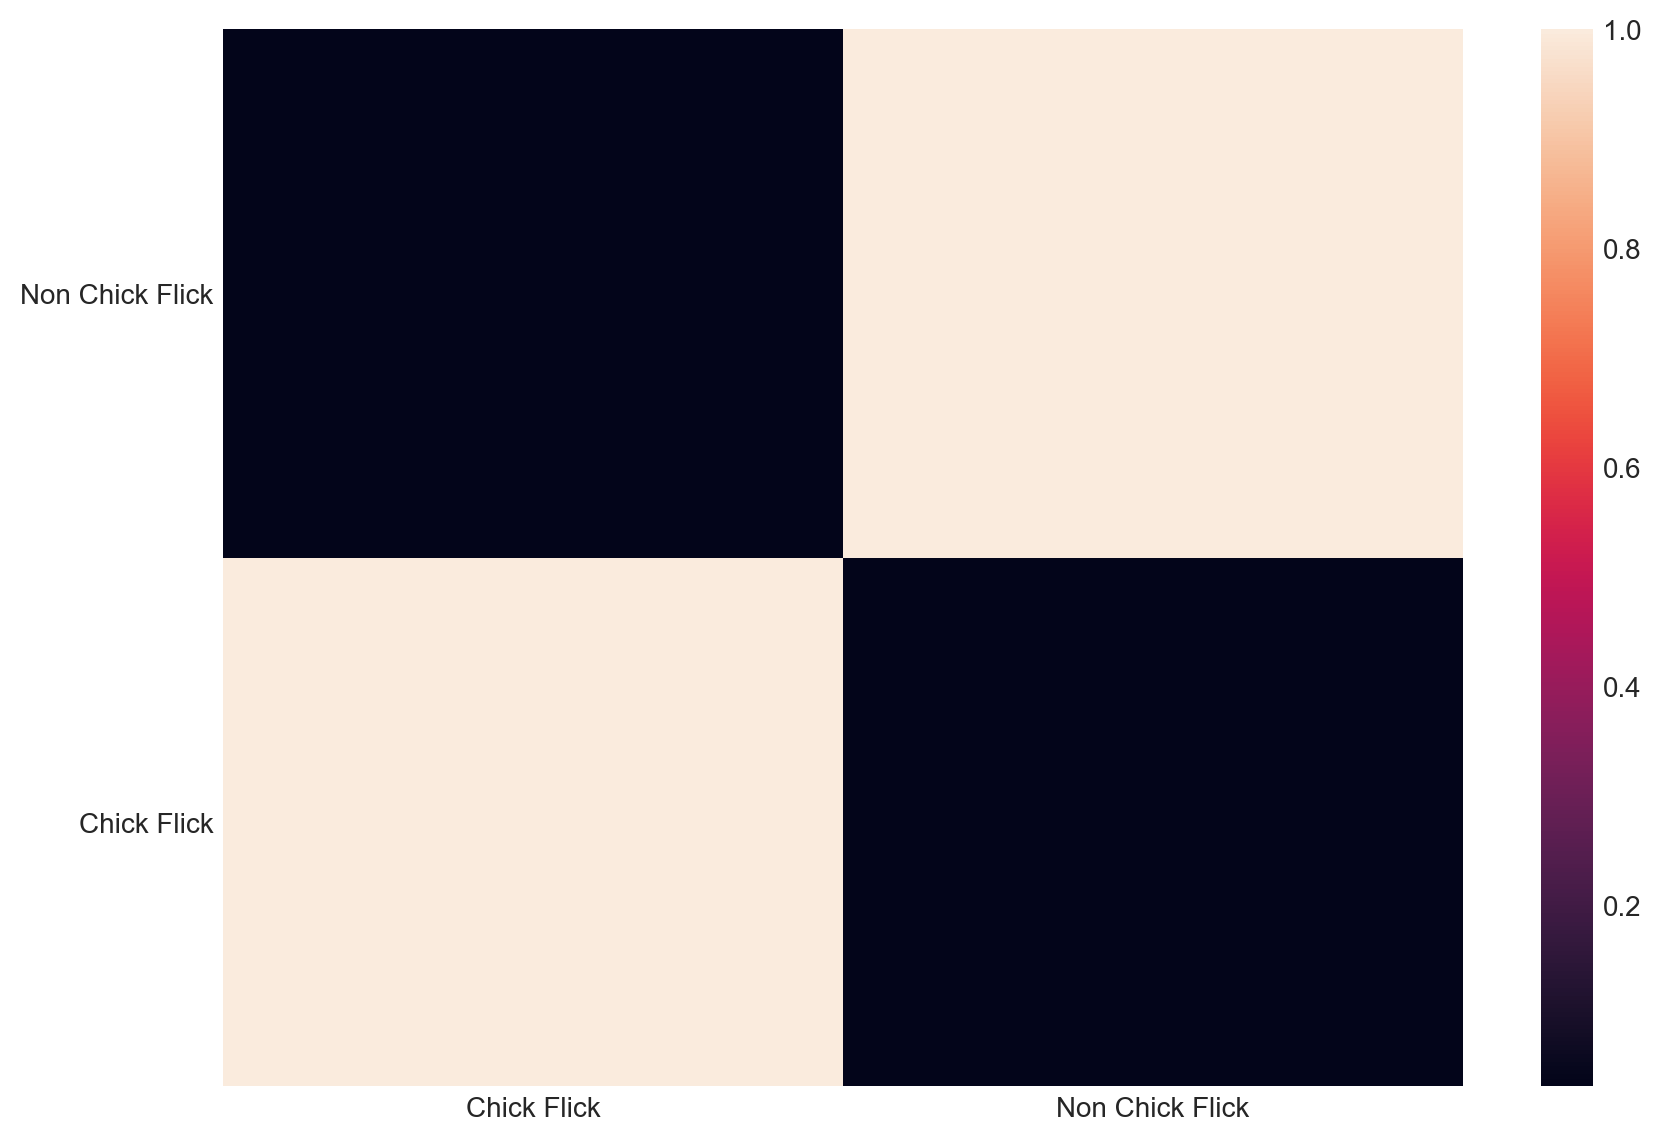

In [217]:
plot_heatmap(if_chick_flick, if_chick_flick, filmD2V)

In [113]:
years_lst = sorted(list(films.year.unique()))

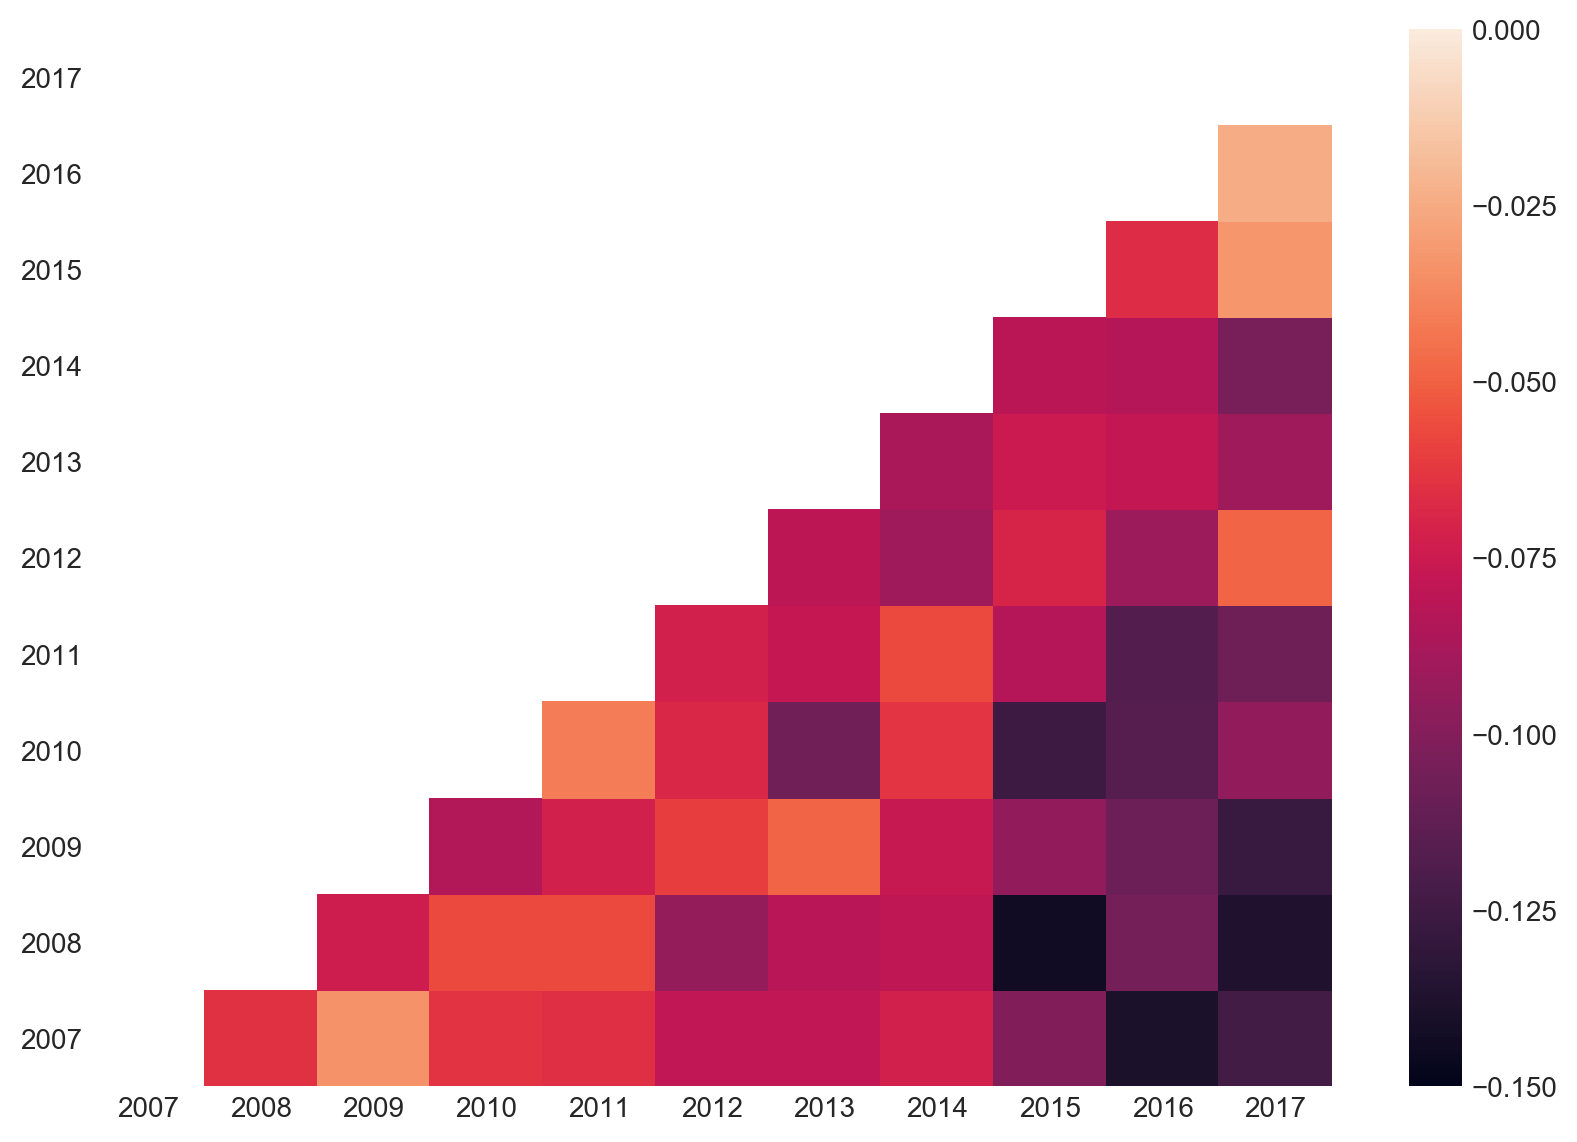

In [218]:
plot_heatmap_v(years_lst, years_lst, filmD2V, vmin=-0.15, vmax=0)

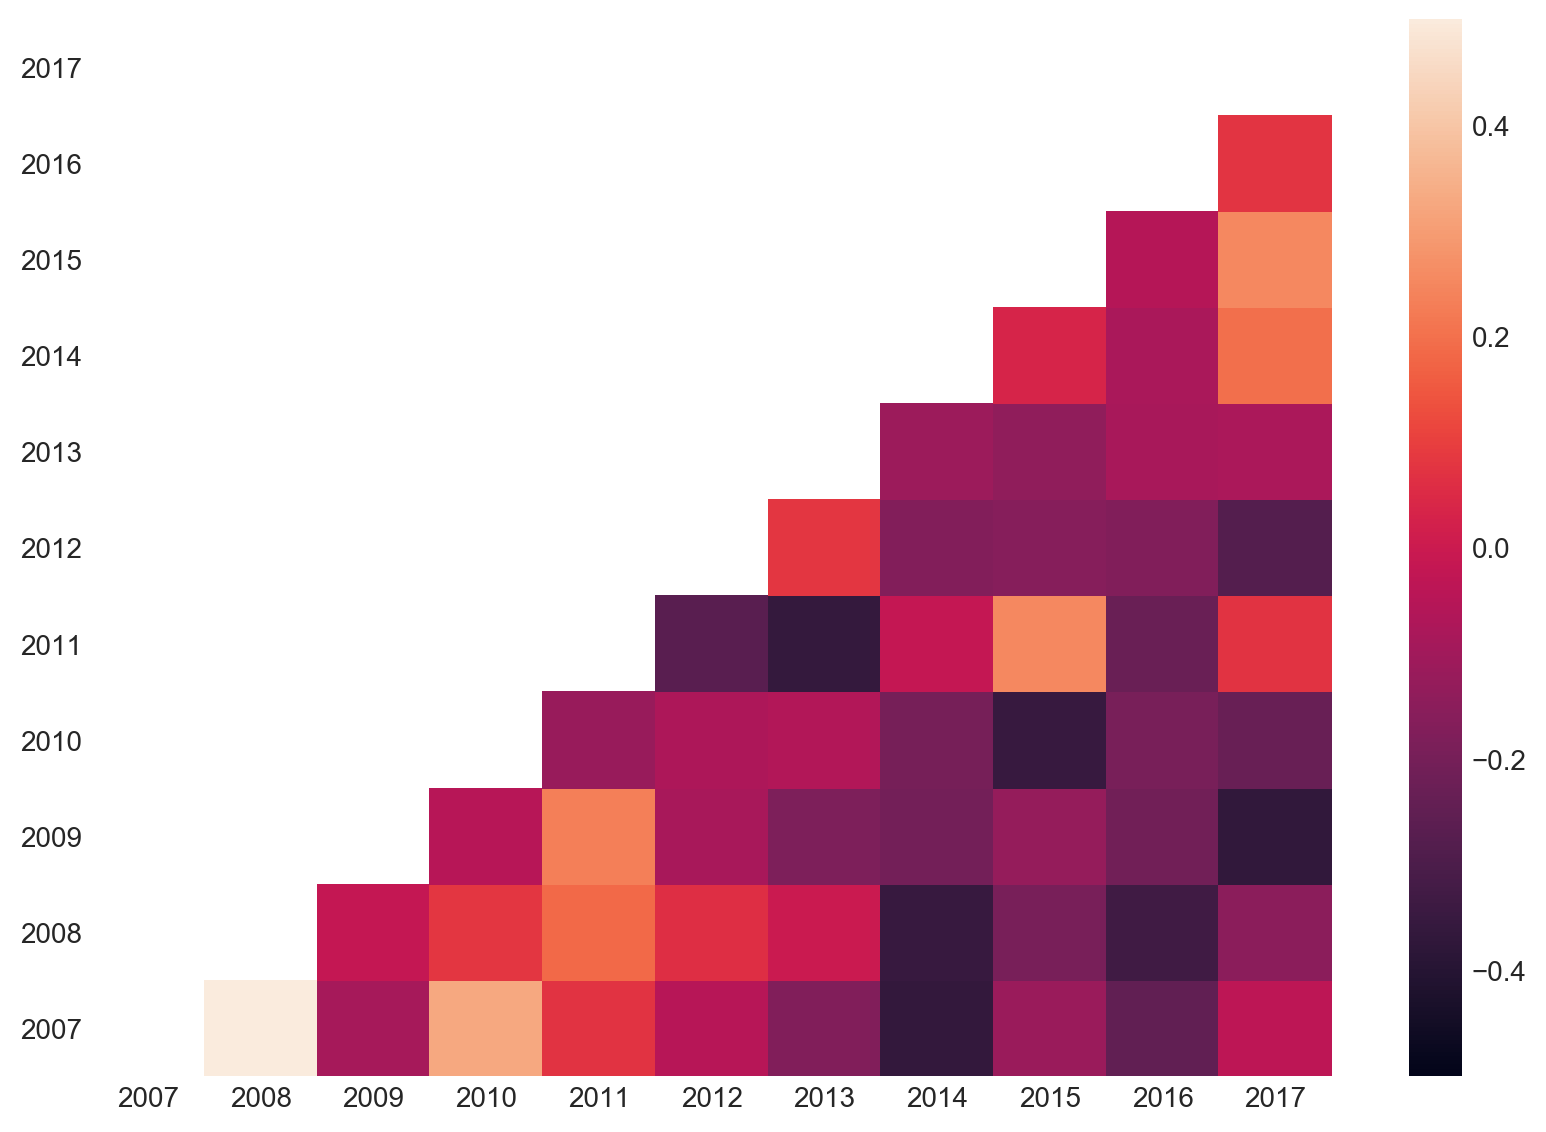

In [220]:
plot_heatmap_v(years_lst, years_lst, chick_flickD2V, vmin=-0.5, vmax=0.5)

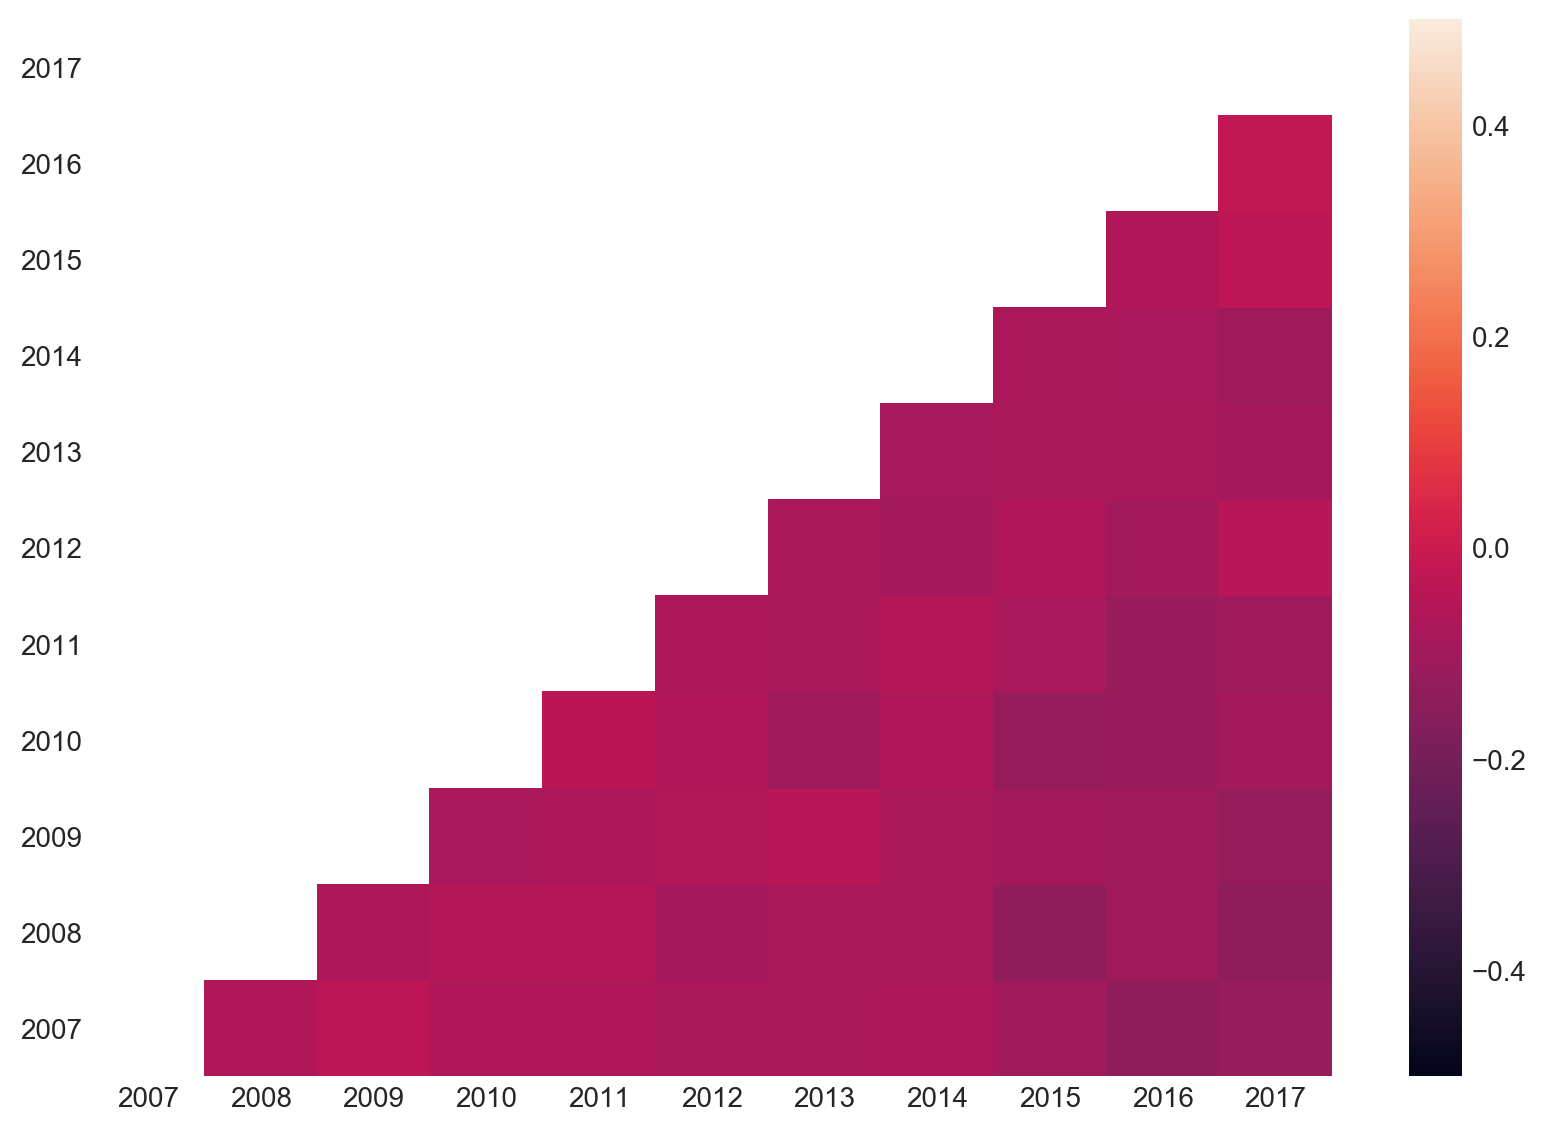

In [219]:
plot_heatmap_v(years_lst, years_lst, filmD2V, vmin=-0.5, vmax=0.5)

In [221]:
del filmD2V
del chick_flickD2V

Word2Vec:

In [165]:
import copy
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [342]:
def compareModels(df, category, sort = True):
    """If you are using time as your category sorting is important"""
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        #embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF['normalized_sents'].sum())
        
        modelW2V = gensim.models.word2vec.Word2Vec(size=300, alpha=0.025, min_alpha=0.025, min_count=2) 
        modelW2V.build_vocab(subsetDF['normalized_sents'].sum())
        for epoch in range(9):
            modelW2V.train(subsetDF['normalized_sents'].sum(), total_examples=modelW2V.corpus_count, epochs = 1)
            modelW2V.alpha -= 0.002 # decrease the learning rate
            modelW2V.min_alpha = modelW2V.alpha # fix the learning rate, no decay
        embeddings_raw[cat] = modelW2V
        
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [343]:
def compareModels_ck(df, category, sort = True):
    """If you are using time as your category sorting is important"""
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        #embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF['normalized_sents'].sum())
        
        modelW2V = gensim.models.word2vec.Word2Vec(size=250, alpha=0.025, min_alpha=0.025, min_count=2) 
        modelW2V.build_vocab(subsetDF['normalized_sents'].sum())
        for epoch in range(6):
            modelW2V.train(subsetDF['normalized_sents'].sum(), total_examples=modelW2V.corpus_count, epochs = 1)
            modelW2V.alpha -= 0.002 # decrease the learning rate
            modelW2V.min_alpha = modelW2V.alpha # fix the learning rate, no decay
        embeddings_raw[cat] = modelW2V
        
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [168]:
# overall by chick flick or non chick flick
overall_rawEmbeddings, overall_comparedEmbeddings = compareModels(films, 'chick_flick')

In [344]:
# chick flick films by year
cks_year_rawEmbeddings, cks_year_comparedEmbeddings = compareModels_ck(chick_flicks, 'year')

In [345]:
# all films by year
films_year_rawEmbeddings, films_year_comparedEmbeddings = compareModels(films, 'year')

In [141]:
overall_rawEmbeddings

{'Chick Flick': <gensim.models.word2vec.Word2Vec at 0x198f91550>,
 'Non Chick Flick': <gensim.models.word2vec.Word2Vec at 0x198f91358>}

In [142]:
overall_comparedEmbeddings

{'Chick Flick': [<gensim.models.word2vec.Word2Vec at 0x198f91550>,
 'Non Chick Flick': [<gensim.models.word2vec.Word2Vec at 0x198f91358>,
  <gensim.models.word2vec.Word2Vec at 0x194d52da0>]}

In [176]:
overall_rawEmbeddings['Chick Flick'].save('trained_models/overall_rawEmbeddings_chick_flick.mm')
overall_rawEmbeddings['Non Chick Flick'].save('trained_models/overall_rawEmbeddings_non_chick_flick.mm')
overall_comparedEmbeddings['Chick Flick'][0].save('trained_models/overall_comparedEmbeddings_cf1.mm')
overall_comparedEmbeddings['Chick Flick'][1].save('trained_models/overall_comparedEmbeddings_cf2.mm')
overall_comparedEmbeddings['Chick Flick'][2].save('trained_models/overall_comparedEmbeddings_cf3.mm')
overall_comparedEmbeddings['Non Chick Flick'][0].save('trained_models/overall_comparedEmbeddings_ncf1.mm')
overall_comparedEmbeddings['Non Chick Flick'][1].save('trained_models/overall_comparedEmbeddings_ncf2.mm')
overall_comparedEmbeddings['Non Chick Flick'][2].save('trained_models/overall_comparedEmbeddings_ncf3.mm')

In [346]:
def save_rawEmbeddings(rawEmbeddings, rawEmbeddings_name):
    for key, value in rawEmbeddings.items():
        file_name = 'trained_models/' + rawEmbeddings_name + '_' + str(key) + '.mm'
        rawEmbeddings[key].save(file_name)

In [347]:
save_rawEmbeddings(films_year_rawEmbeddings, 'films_year_rawEmbeddings')
save_rawEmbeddings(cks_year_rawEmbeddings, 'cks_year_rawEmbeddings')

In [350]:
def save_comparedEmbeddings(comparedEmbeddings, comparedEmbeddings_name):
    for key, value in comparedEmbeddings.items():
        for i in range(len(value)):
            file_name = 'trained_models/' + comparedEmbeddings_name + '_' + str(key) + '_' + str(i+1) + '.mm'
            comparedEmbeddings[key][i].save(file_name)

In [351]:
save_comparedEmbeddings(films_year_comparedEmbeddings, 'films_year_comparedEmbeddings')
save_comparedEmbeddings(cks_year_comparedEmbeddings, 'cks_year_comparedEmbeddings')

In [197]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

In [198]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)

In [199]:
ck_nonck_wordDivergences = findMostDivergent(overall_comparedEmbeddings)

Found 8354 words to compare


In [202]:
ck_nonck_wordDivergences[:10]

[('sweden', 0.94283336400985718),
 ('stripteas', 0.94084517657756805),
 ('rehab', 0.94008081033825874),
 ('split', 0.92602232843637466),
 ('ahead', 0.9206634983420372),
 ('danni', 0.91797427088022232),
 ('intent', 0.91710861027240753),
 ('avoid', 0.91048432886600494),
 ('digit', 0.90003328025341034),
 ('bug', 0.89574360847473145)]

In [203]:
ck_nonck_wordDivergences[-10:]

[('gummi', 0.140677809715271),
 ('congo', 0.13729721307754517),
 ('lindsay', 0.13590359687805176),
 ('carn', 0.13560205698013306),
 ('milki', 0.12556642293930054),
 ('shrew', 0.12489974498748779),
 ('maxin', 0.12095057964324951),
 ('kc', 0.12084561586380005),
 ('extravaganza', 0.11961239576339722),
 ('swine', 0.099721789360046387)]

In [228]:
def yearly_change_heatmap(targetWord, comparedEmbeddings, vmin, vmax):
    pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
    fig, ax = plt.subplots(figsize = (10, 7), dpi=200)
    
    mask = np.zeros_like(pltDF)
    mask[np.tril_indices_from(mask)] = True
    
    seaborn.set_style("white")
    seaborn.heatmap(pltDF, mask=mask, ax=ax, annot=False, vmin=vmin, vmax=vmax) #set annot True for a lot more information
    
    a = ax.invert_yaxis()
    plt.setp(ax.get_yticklabels(), rotation=360)

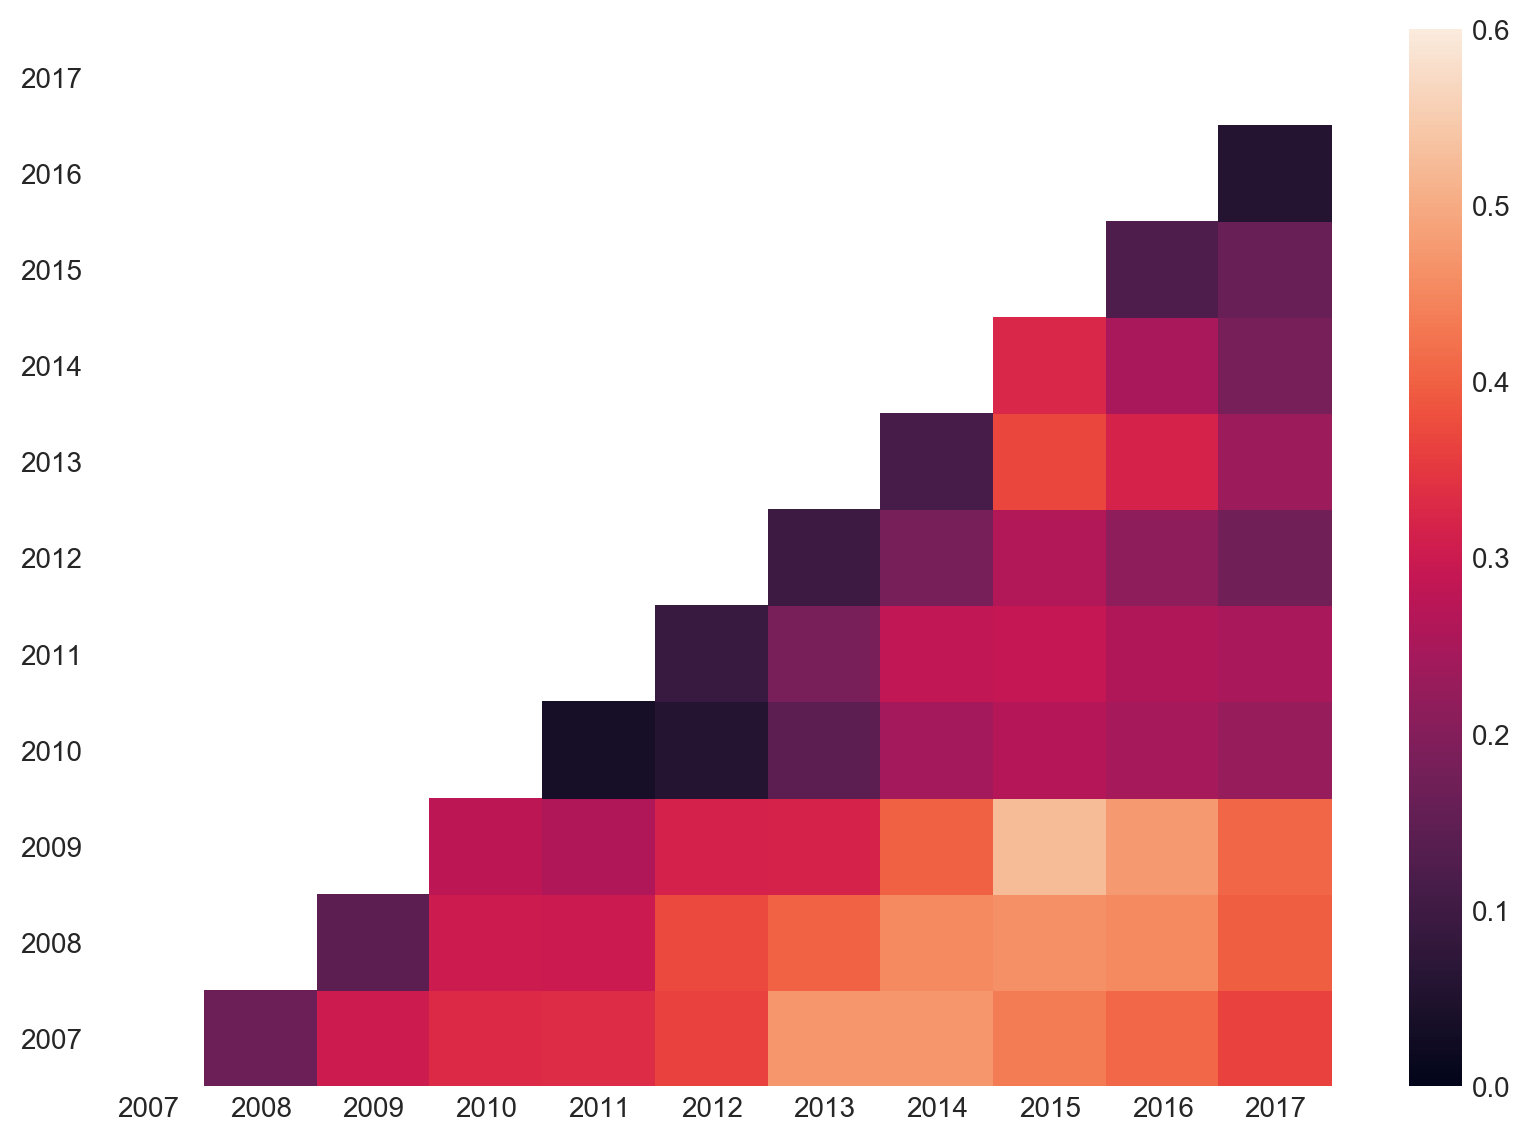

In [352]:
yearly_change_heatmap('woman', films_year_comparedEmbeddings, vmin=0, vmax=0.6)

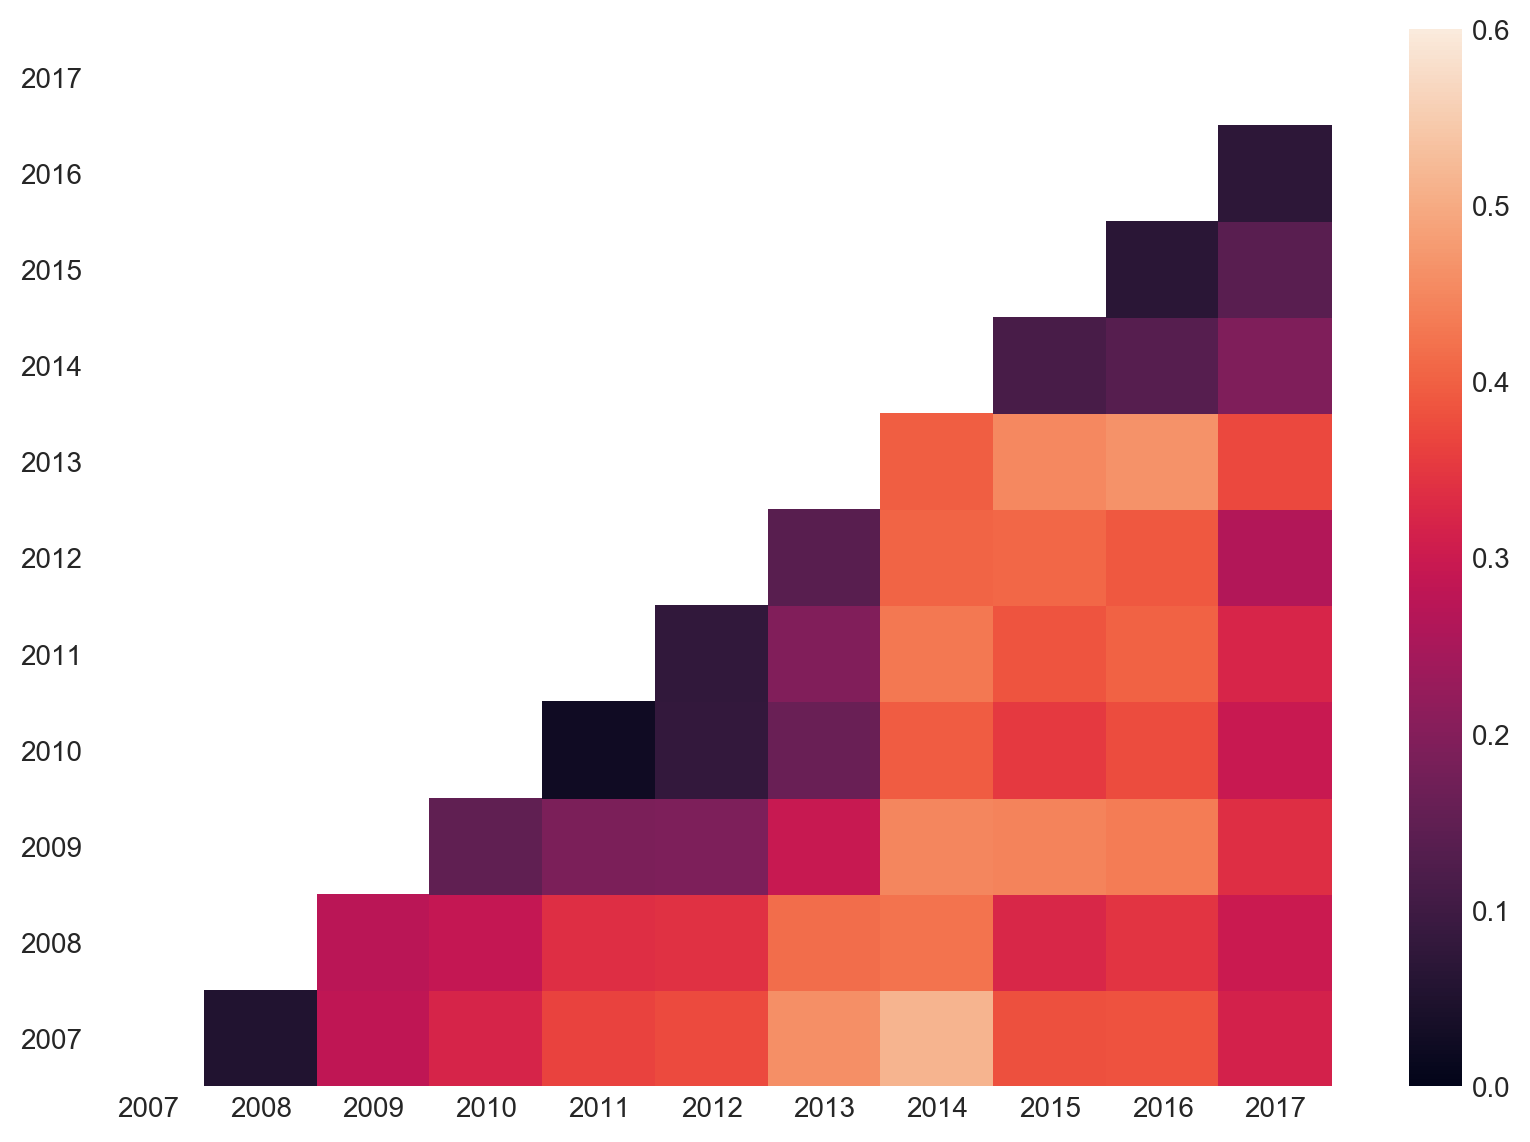

In [353]:
yearly_change_heatmap('man', films_year_comparedEmbeddings, vmin=0, vmax=0.6)

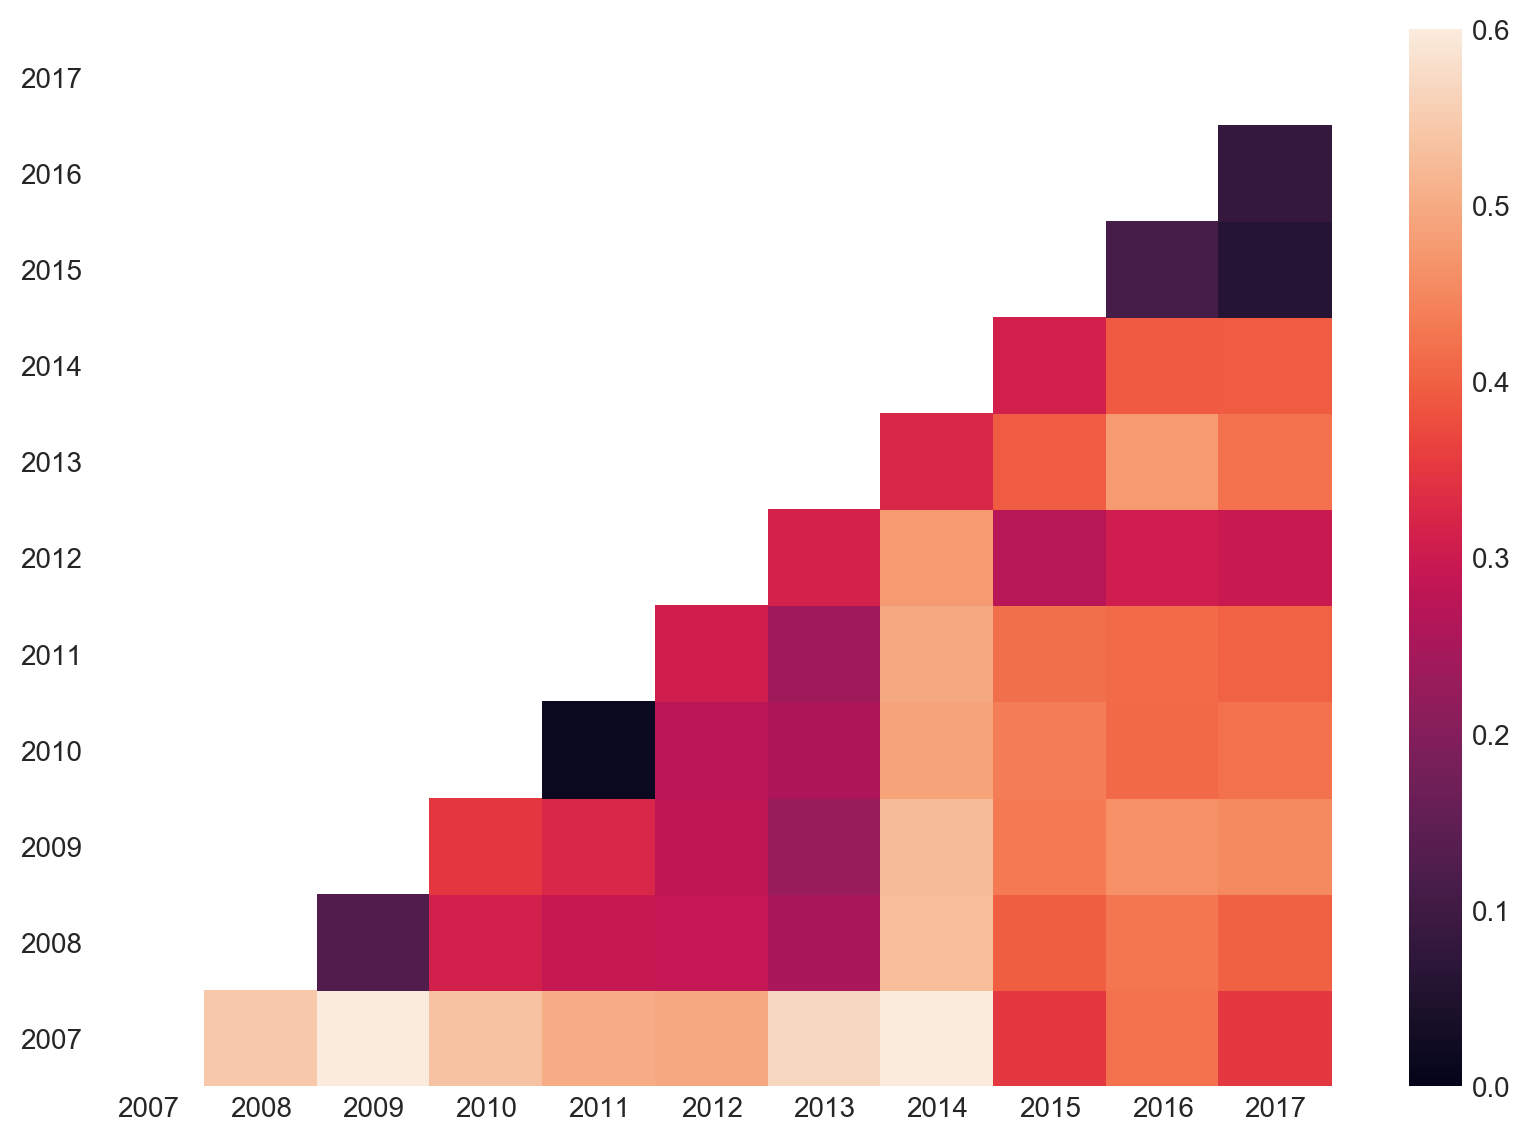

In [354]:
yearly_change_heatmap('wife', films_year_comparedEmbeddings, vmin=0, vmax=0.6)

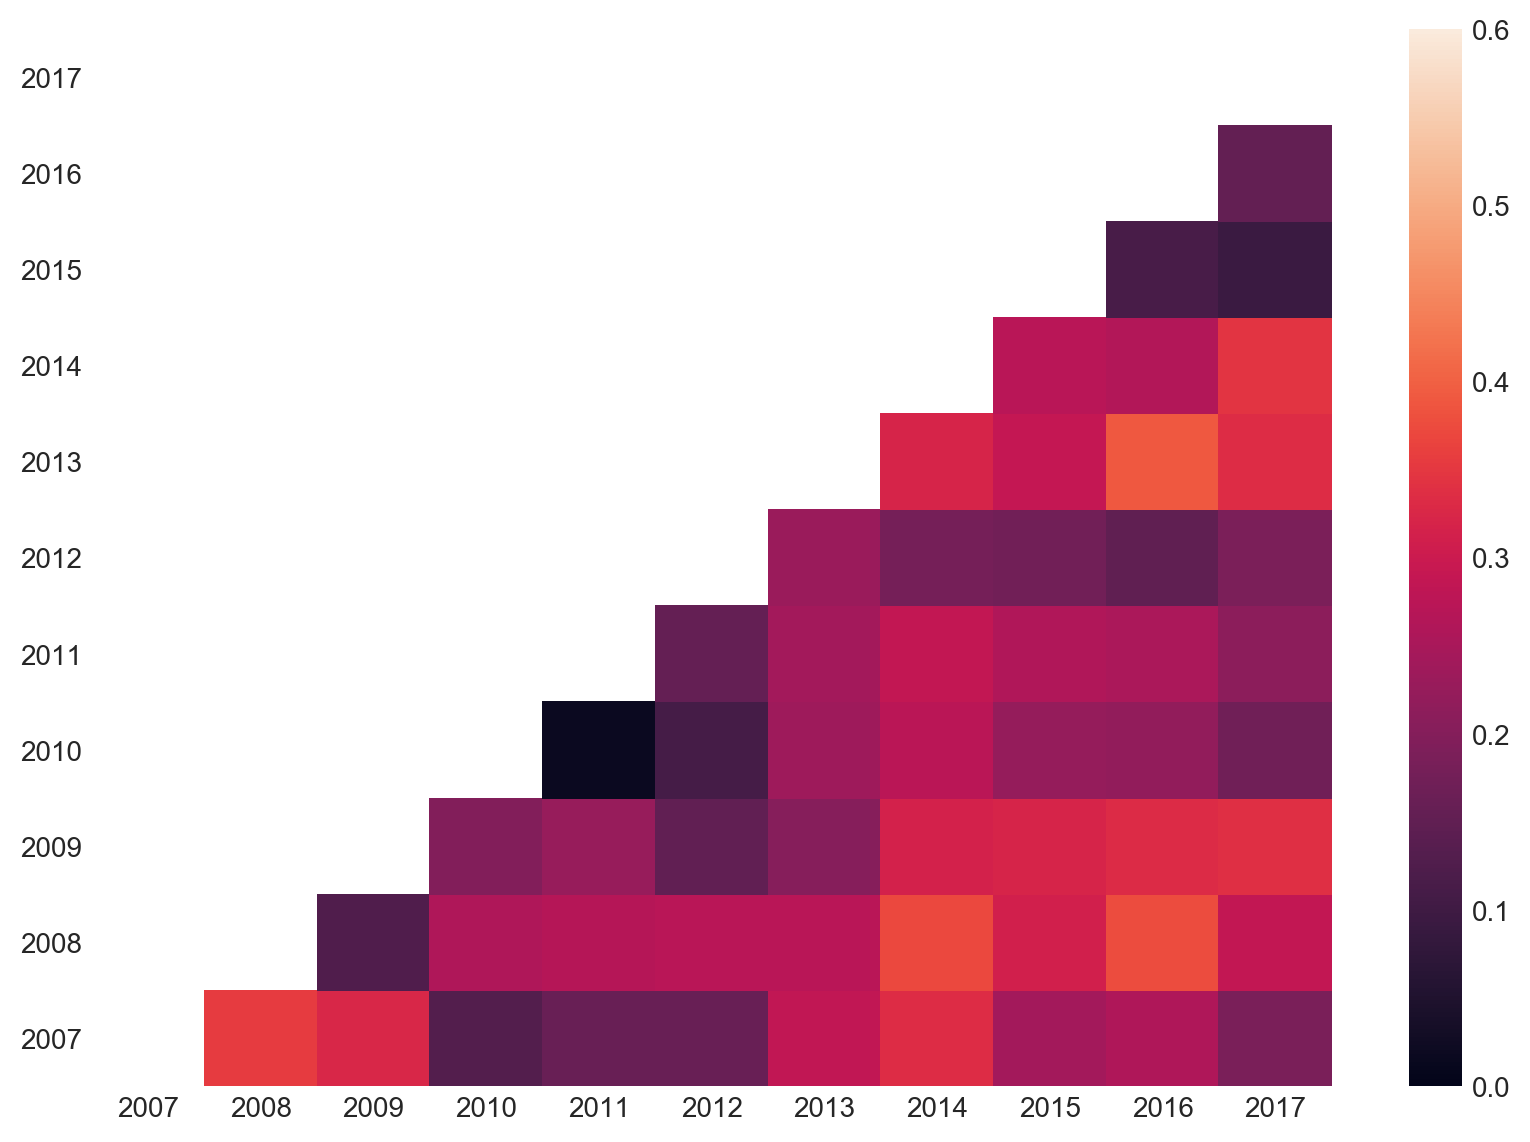

In [355]:
yearly_change_heatmap('husband', films_year_comparedEmbeddings, vmin=0, vmax=0.6)

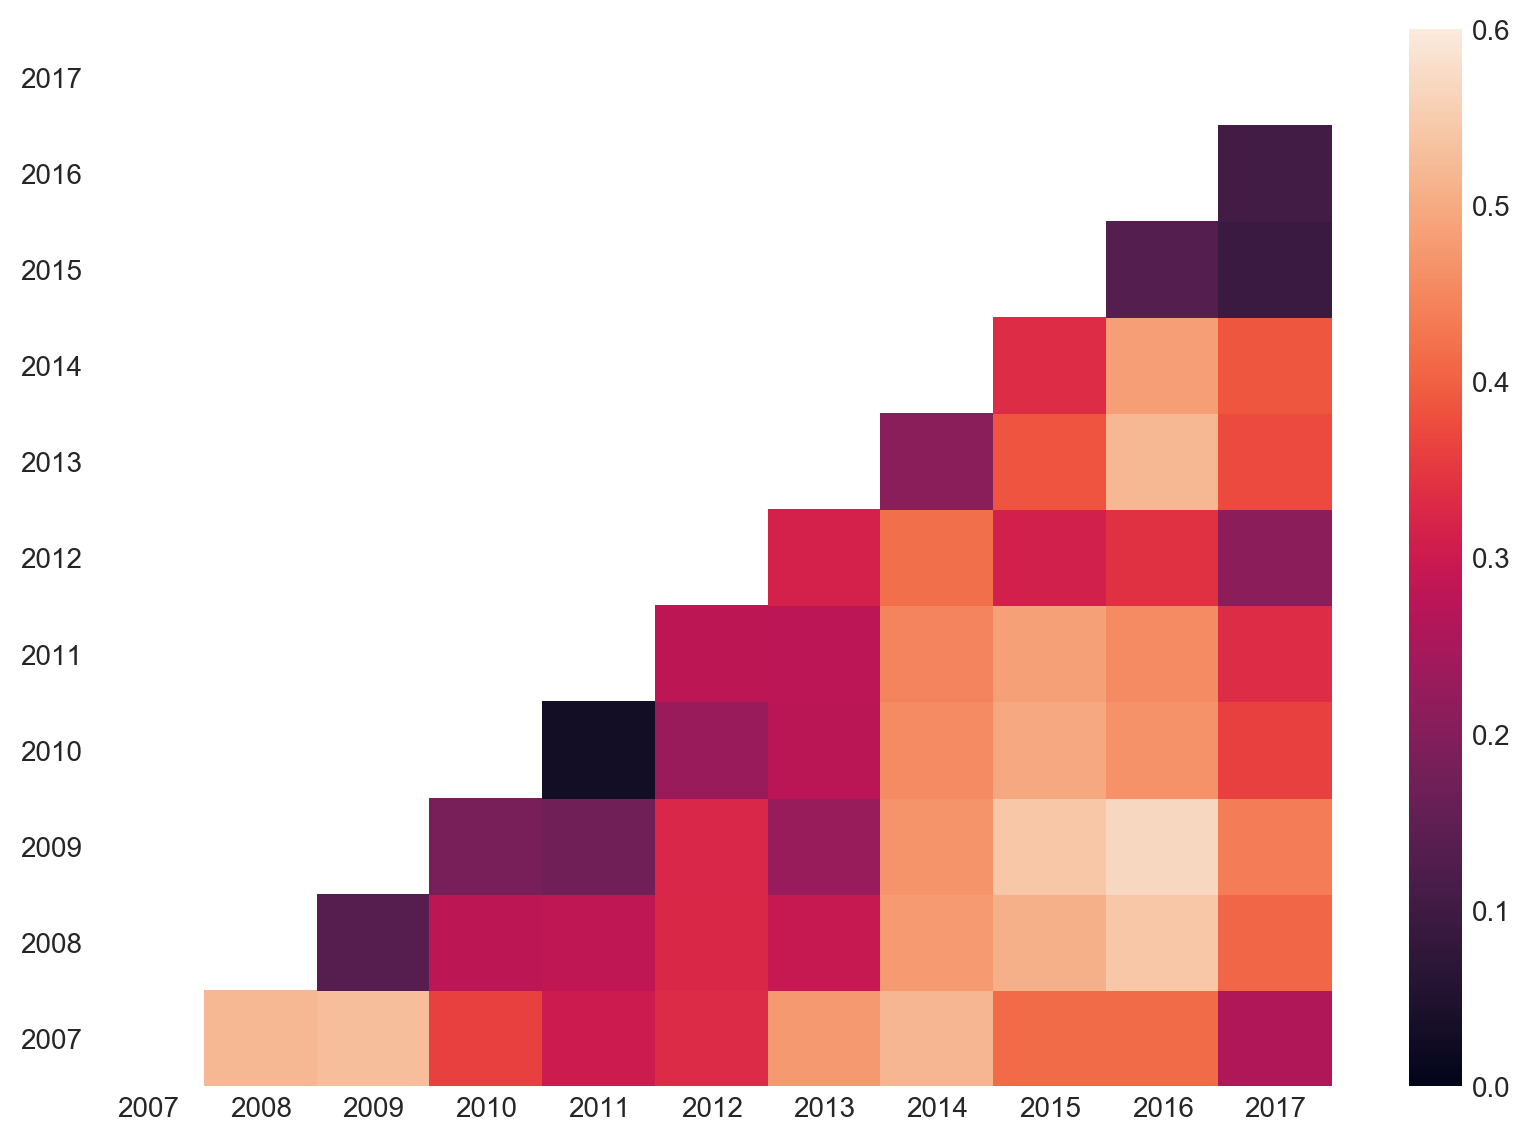

In [356]:
yearly_change_heatmap('mother', films_year_comparedEmbeddings, vmin=0, vmax=0.6)

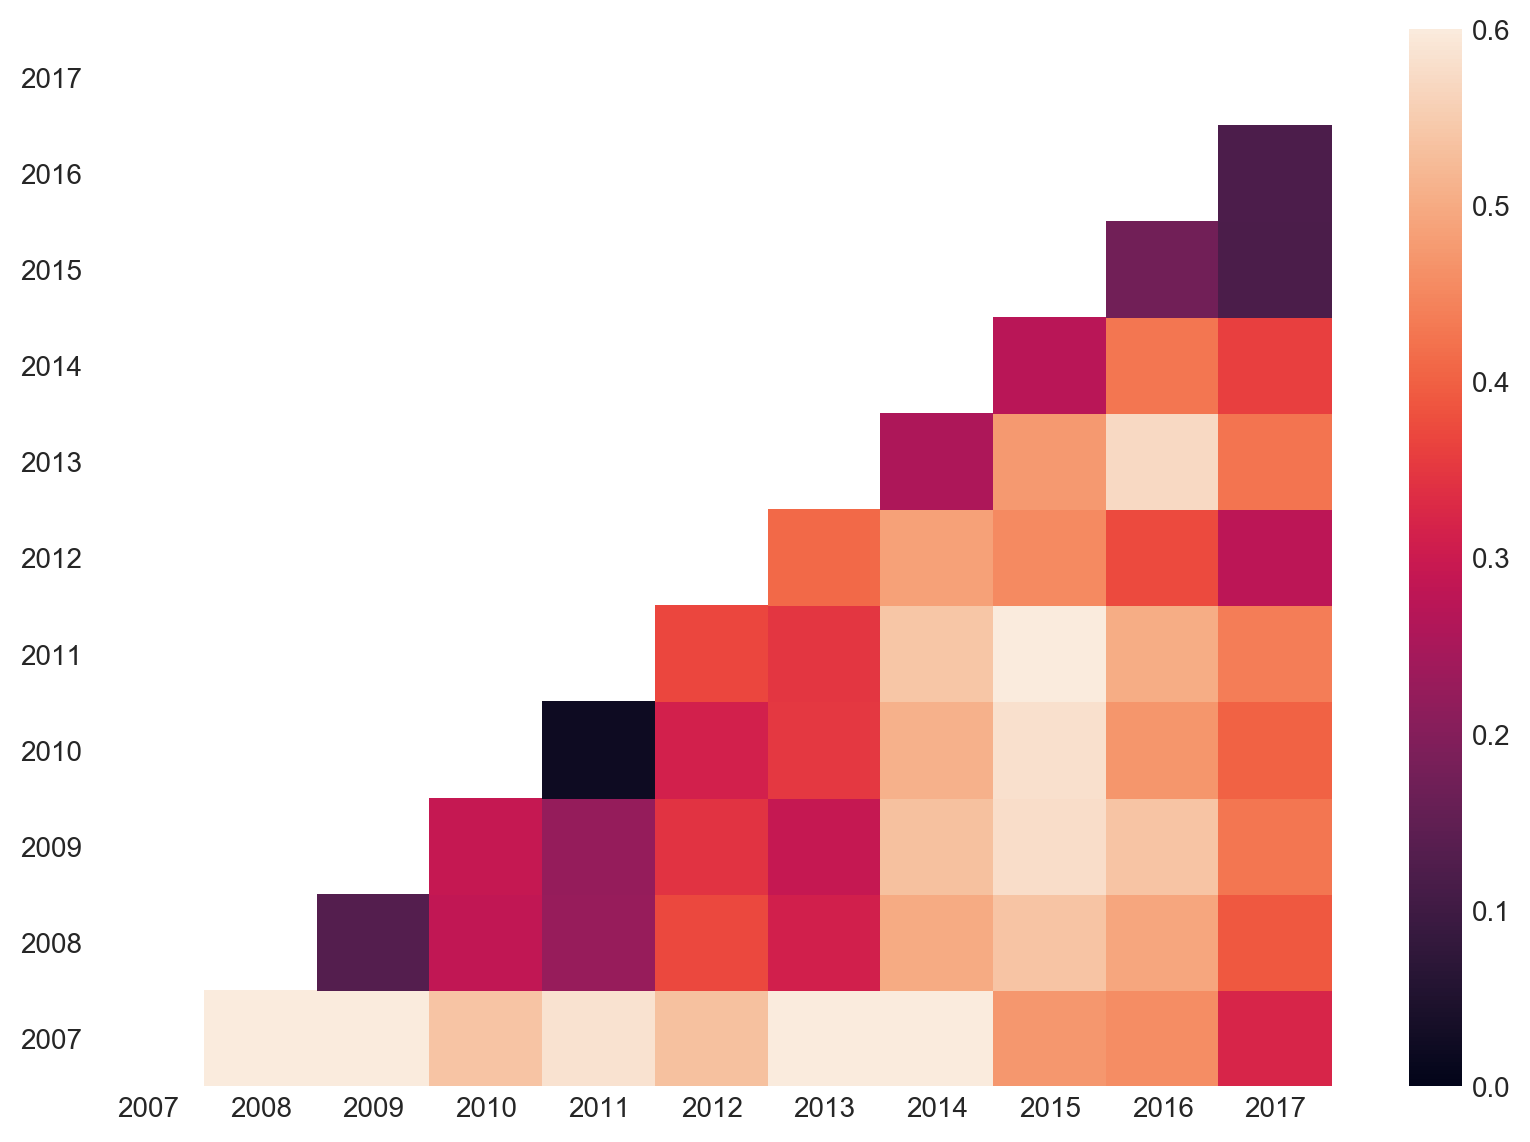

In [357]:
yearly_change_heatmap('father', films_year_comparedEmbeddings, vmin=0, vmax=0.6)

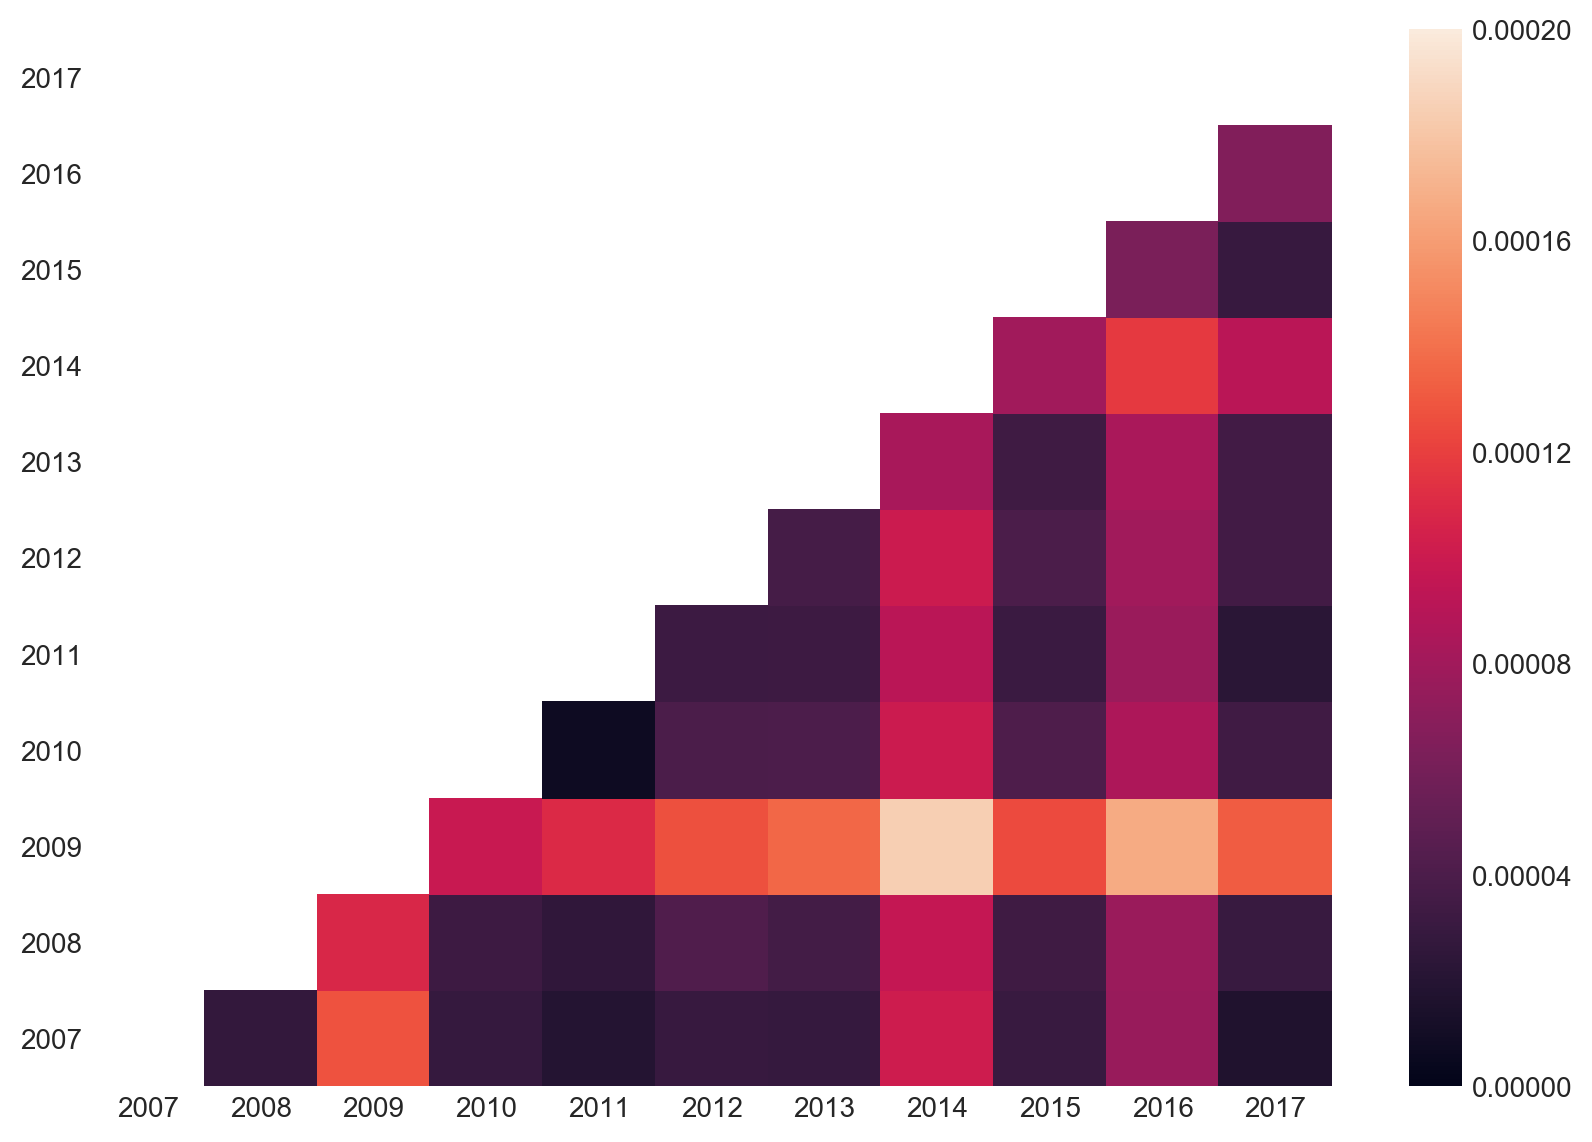

In [362]:
yearly_change_heatmap('woman', cks_year_comparedEmbeddings, vmin=0, vmax=0.0002)

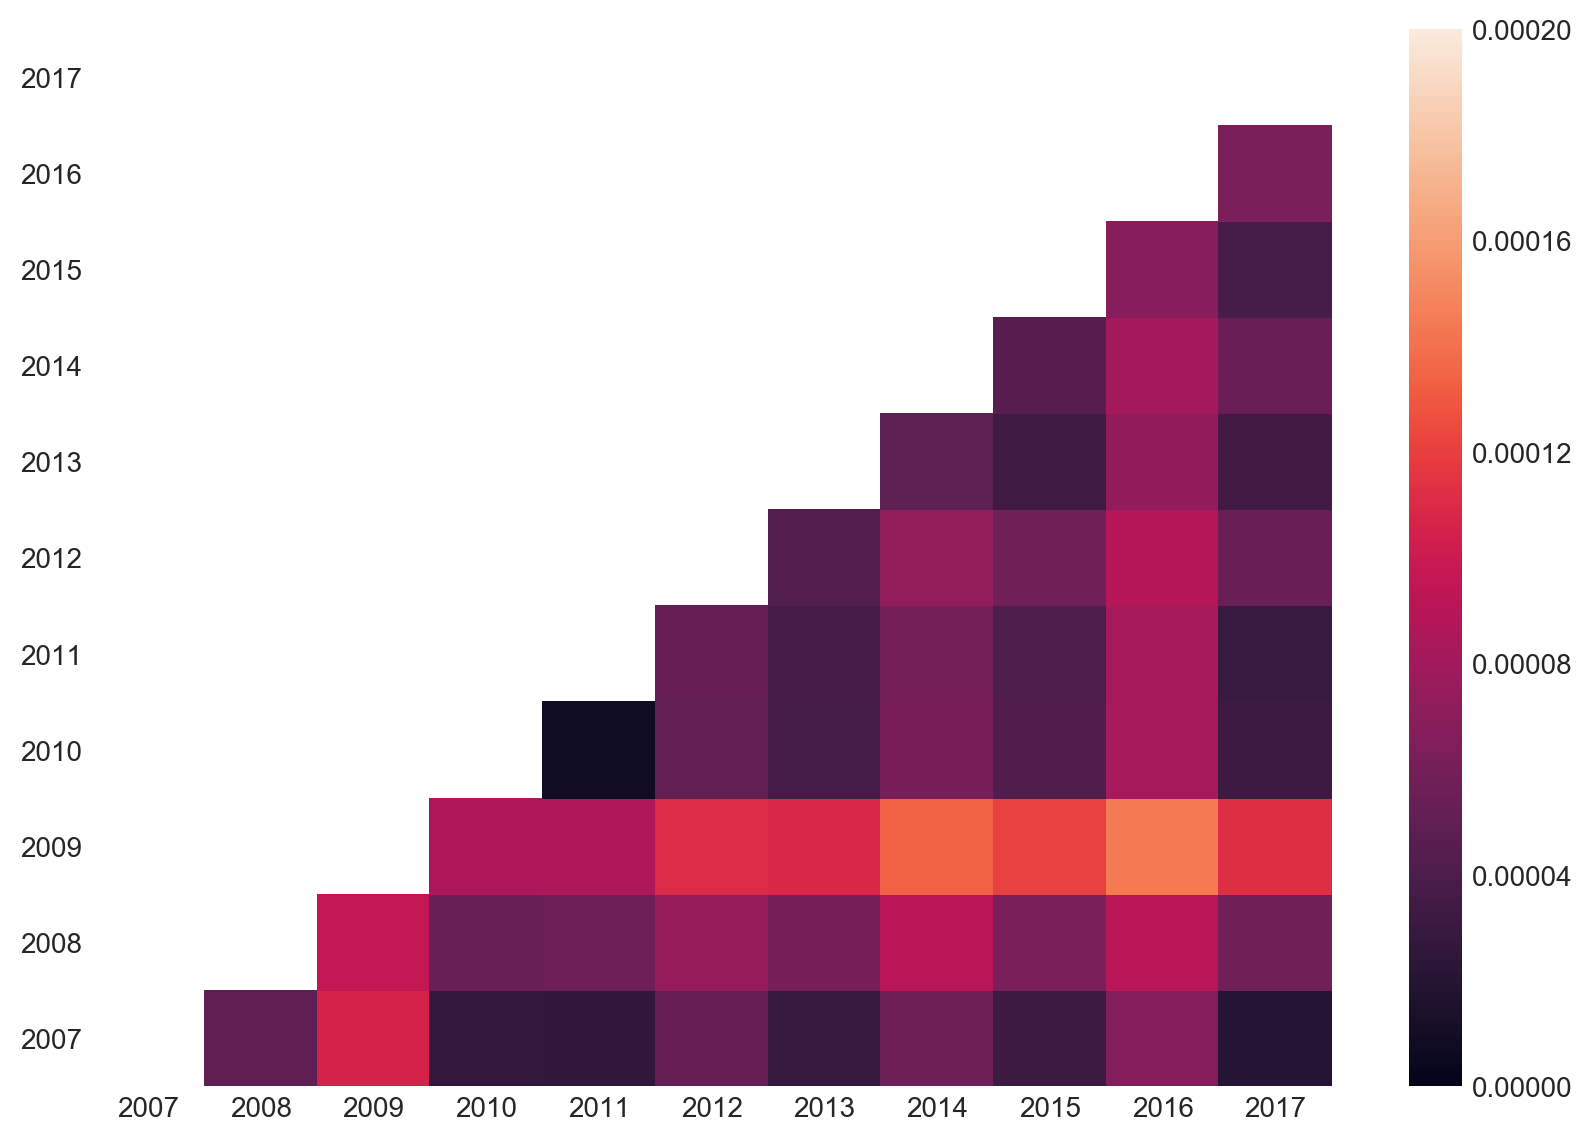

In [361]:
yearly_change_heatmap('man', cks_year_comparedEmbeddings, vmin=0, vmax=0.0002)

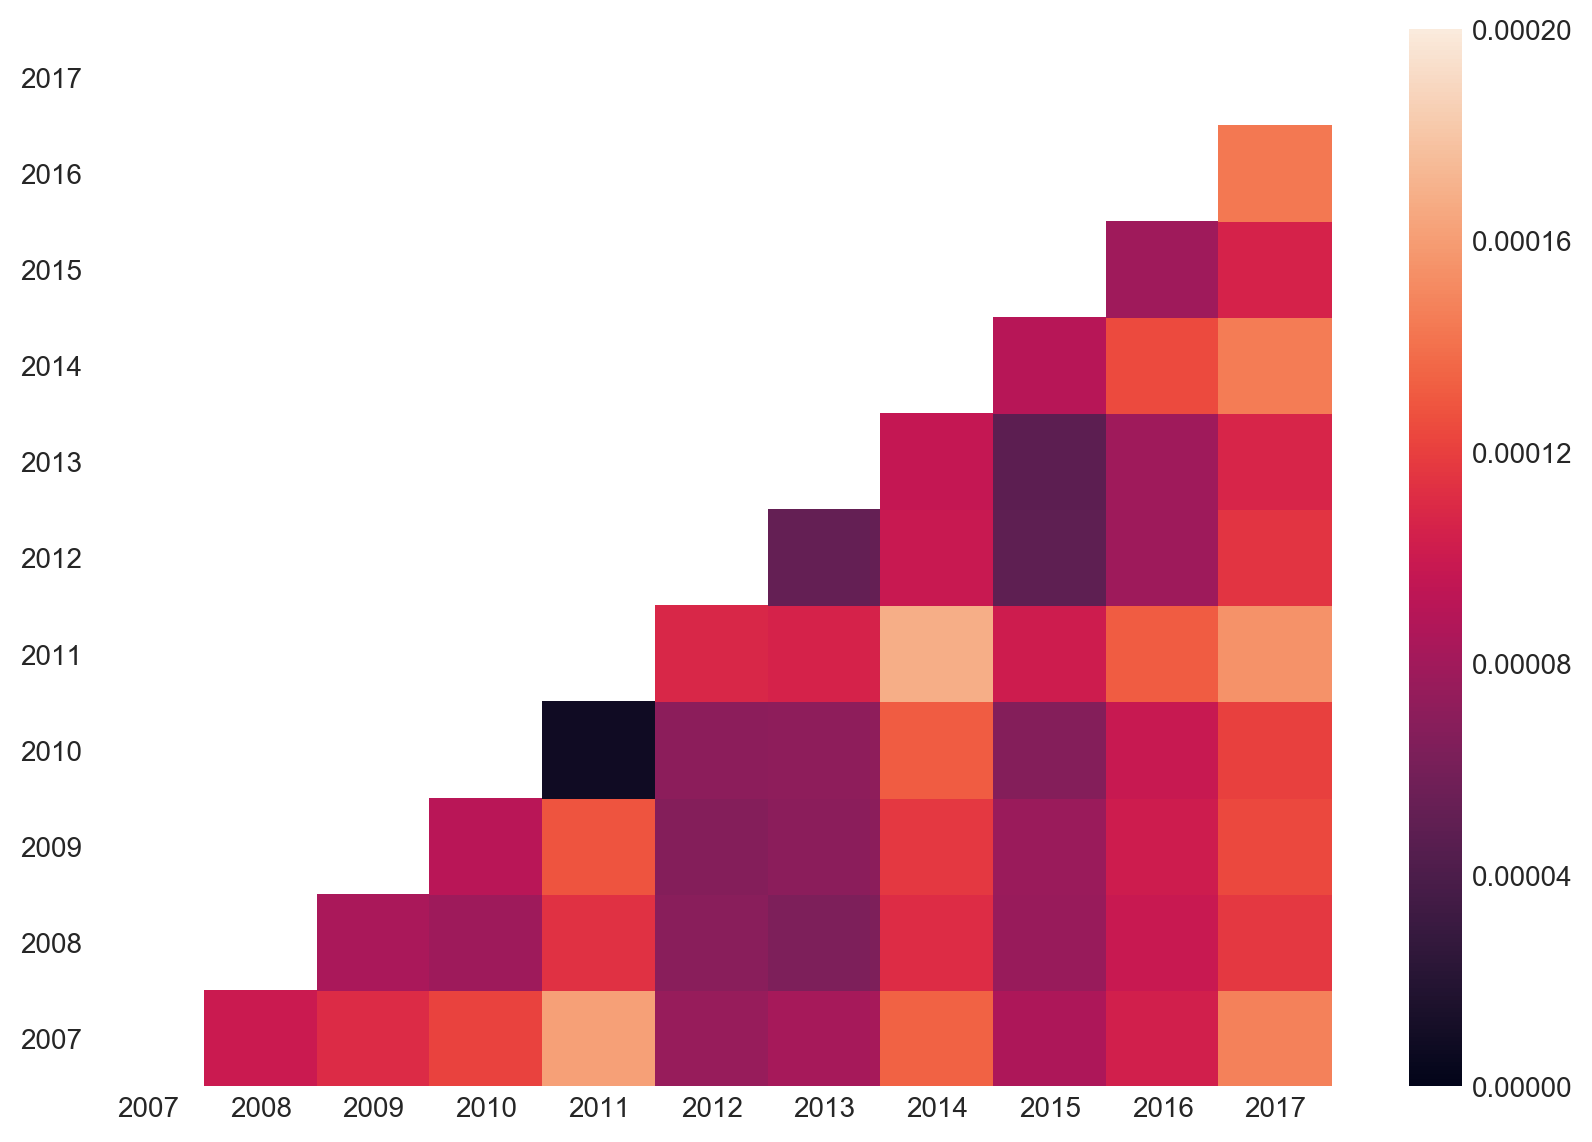

In [364]:
yearly_change_heatmap('wife', cks_year_comparedEmbeddings, vmin=0, vmax=0.0002)

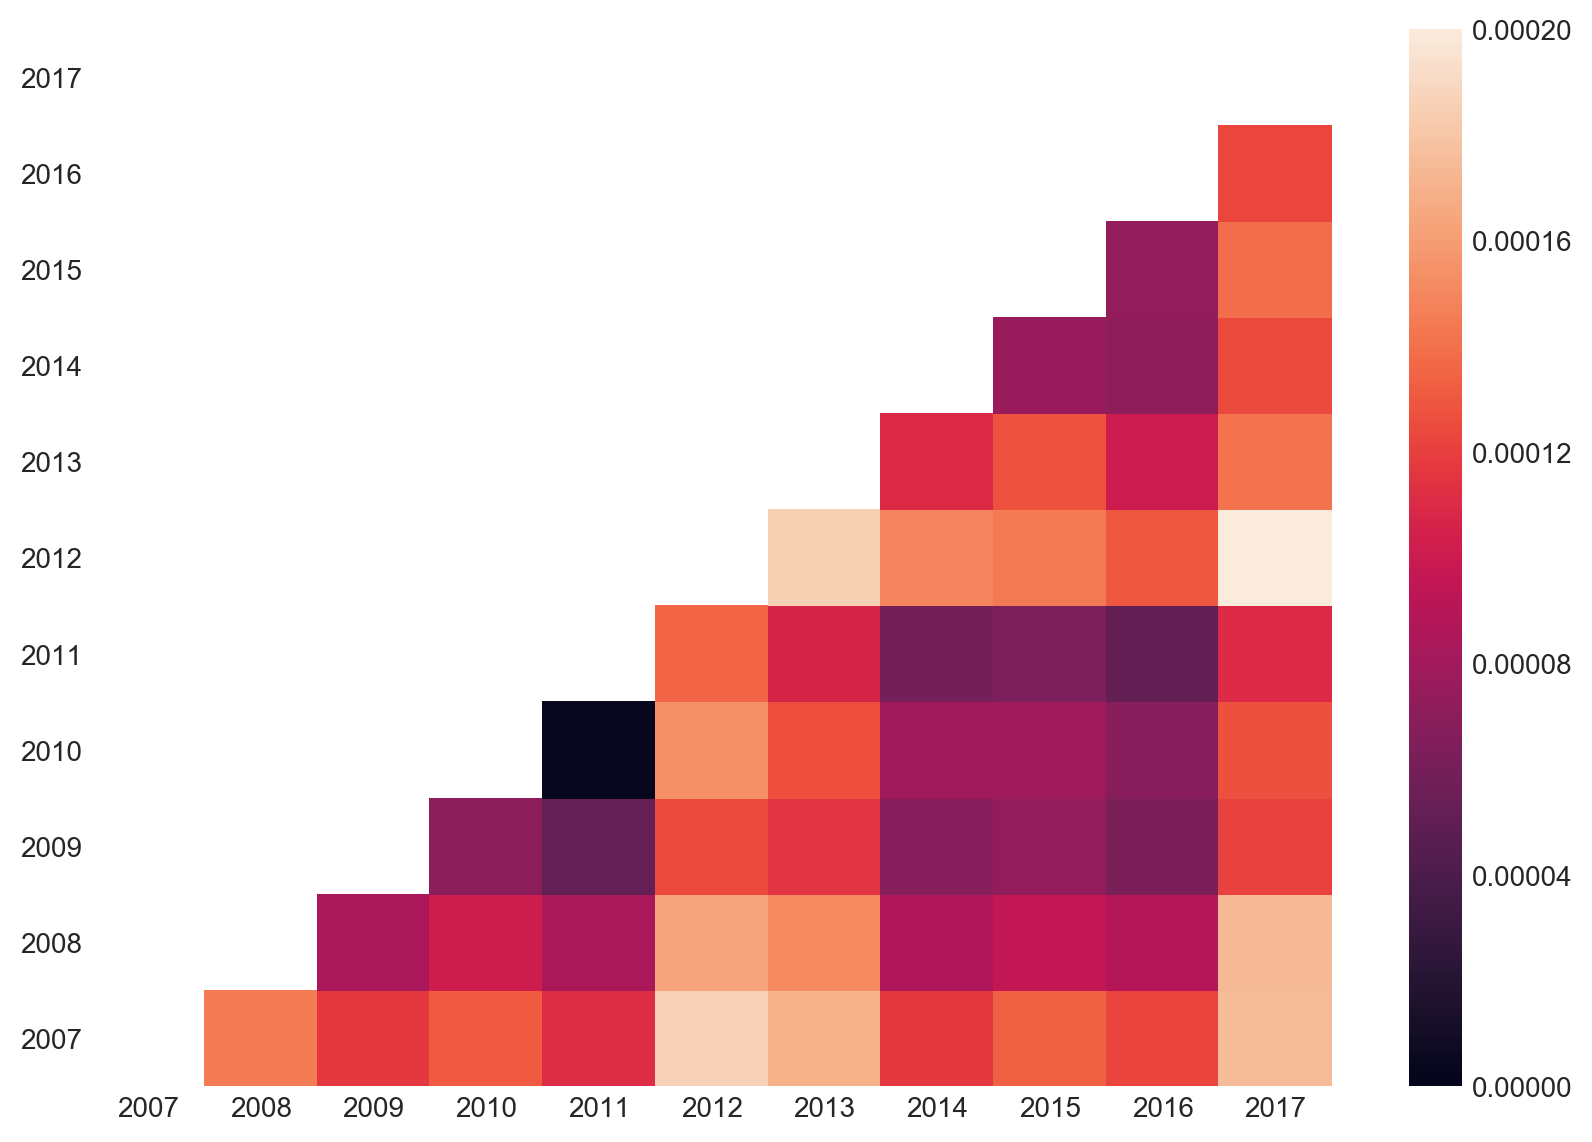

In [365]:
yearly_change_heatmap('husband', cks_year_comparedEmbeddings, vmin=0, vmax=0.0002)

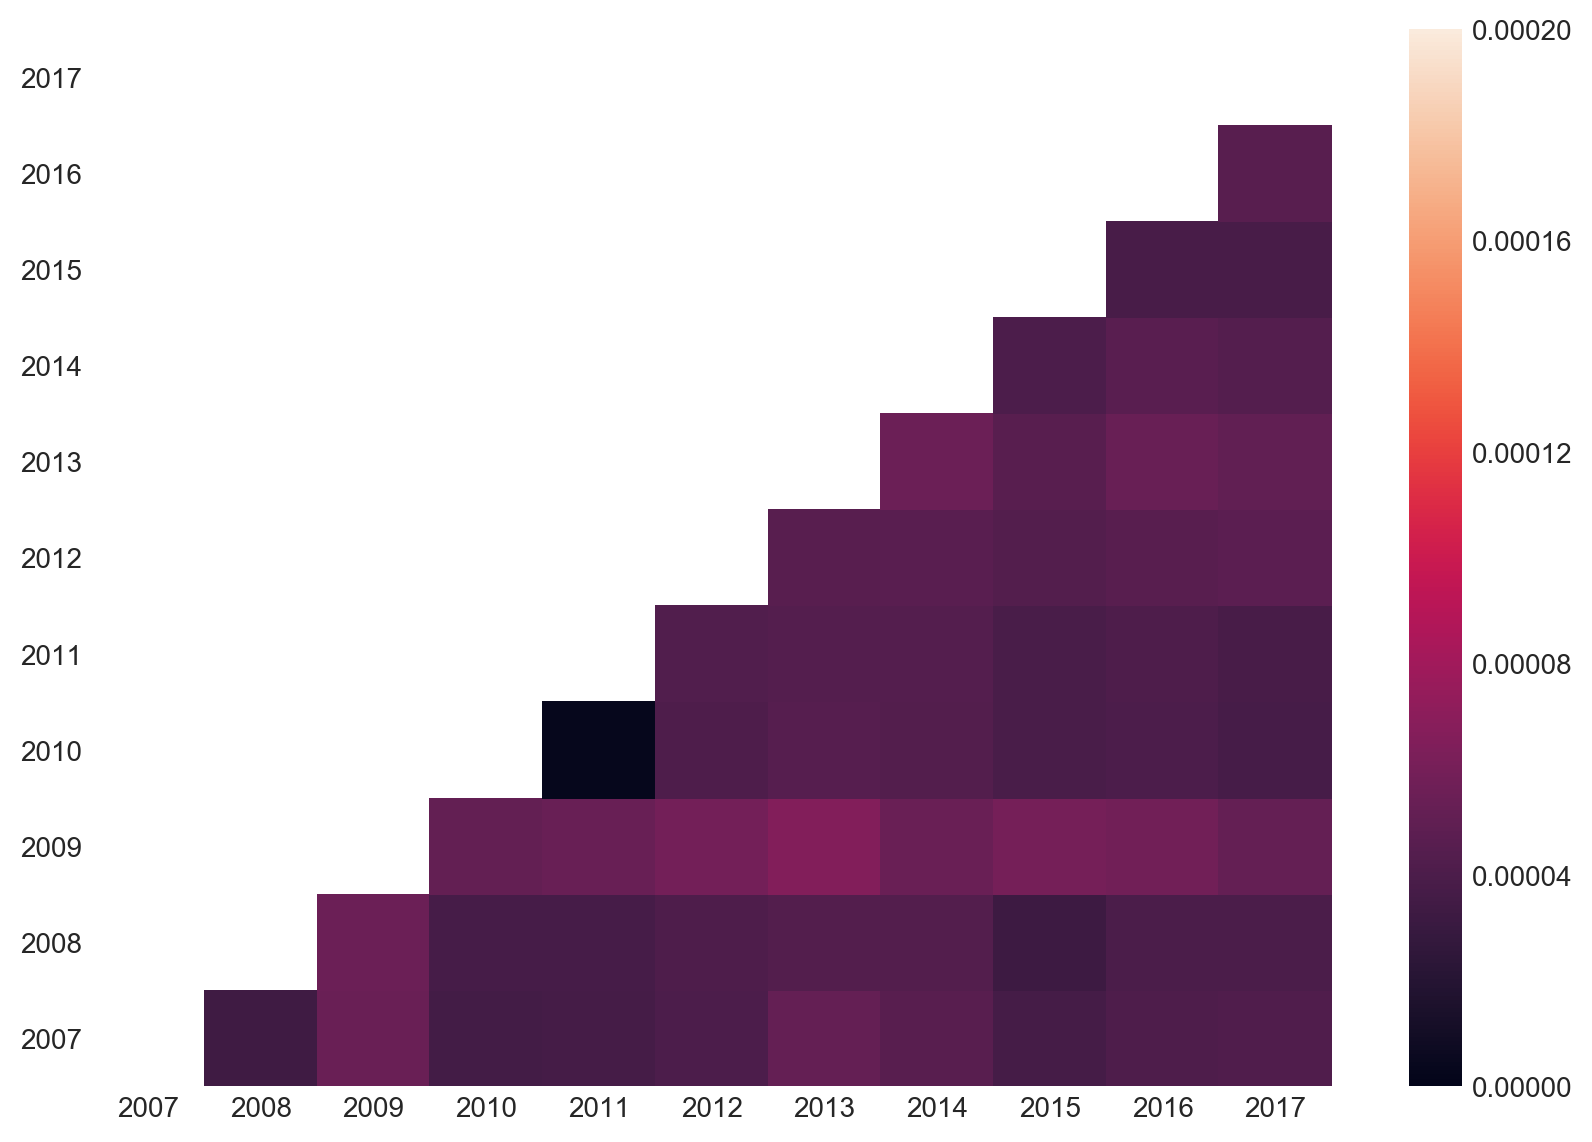

In [366]:
yearly_change_heatmap('mother', cks_year_comparedEmbeddings, vmin=0, vmax=0.0002)

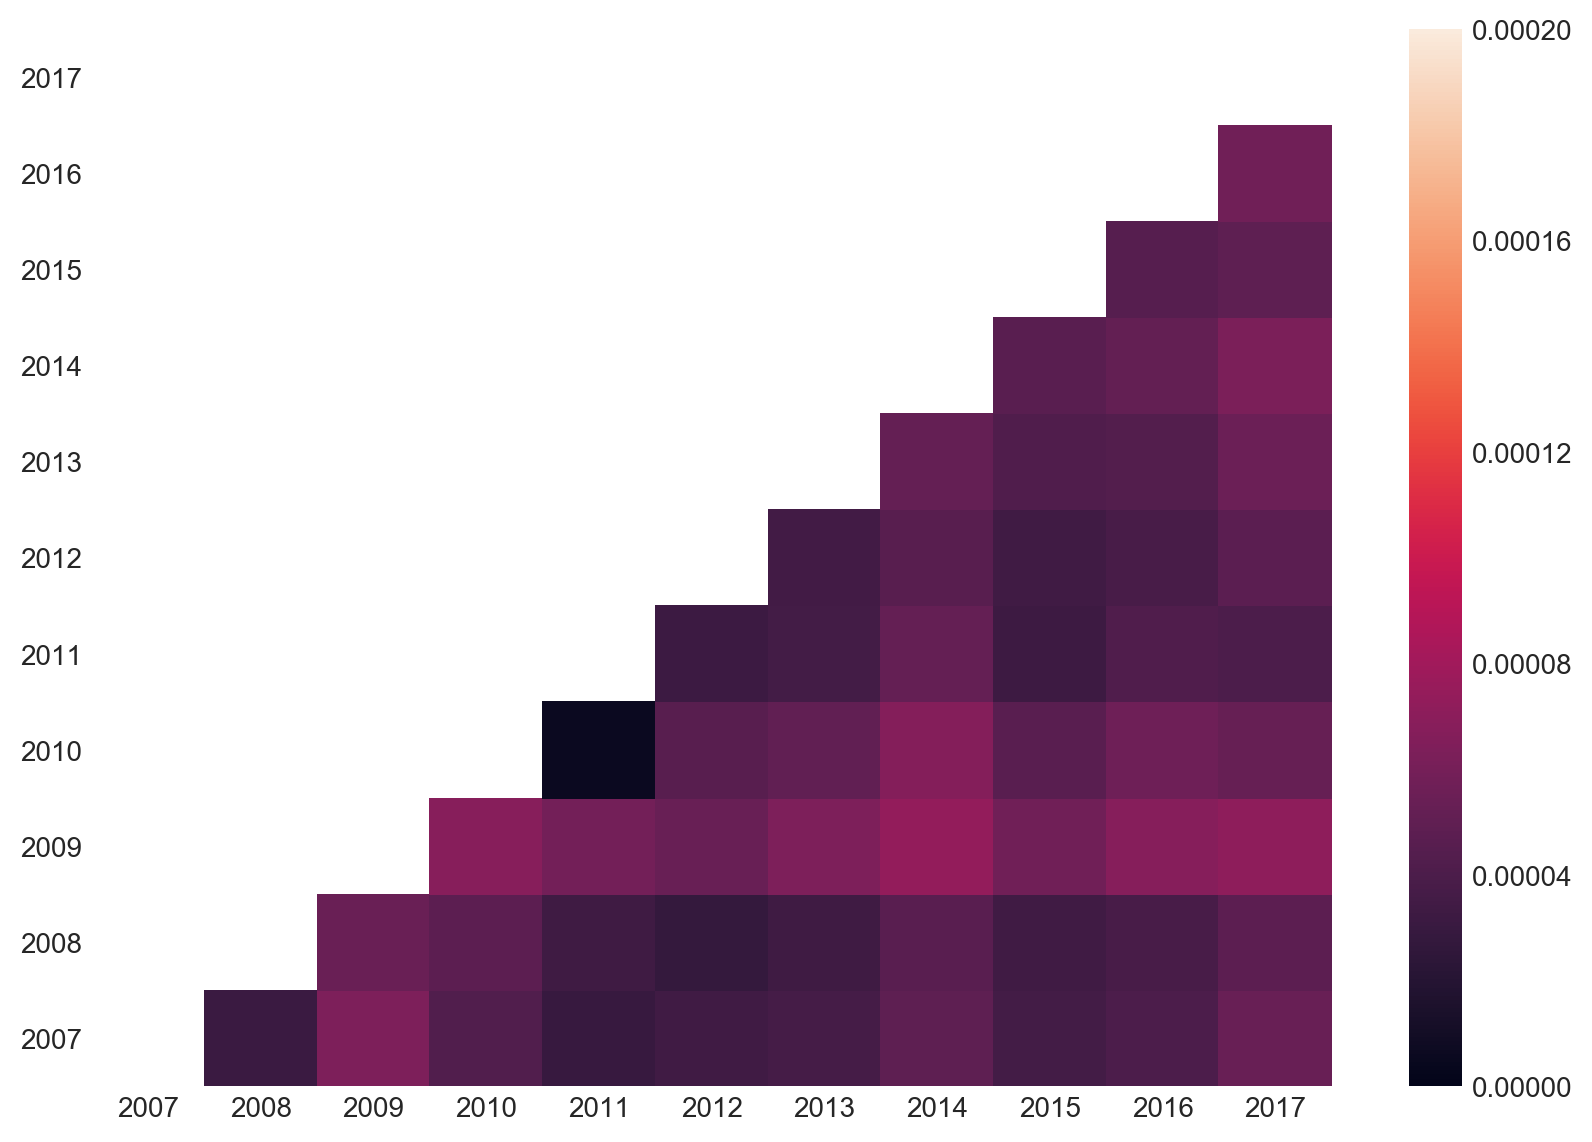

In [369]:
yearly_change_heatmap('father', cks_year_comparedEmbeddings, vmin=0, vmax=0.0002)

In [423]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [424]:
import statistics

In [425]:
def makeDF(rawEmbeddings, traits):
    df = pandas.DataFrame(index=traits.keys())
    for year, model in rawEmbeddings.items():
        cos_sim = []
        Gender = dimension(model, ['man', 'him', 'he', 'himself', 'boy', 'father', 'husband'], ['woman', 'her', 'she', 'herself', 'girl', 'ladi', 'mother', 'wife'])
        #print(Gender)
        for trait, trait_words in traits.items():
            cos_score = []
            for trait_word in trait_words:
                cos_score.append(sklearn.metrics.pairwise.cosine_similarity(model[trait_word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
                #print(trait_word,cos_score)
            median_cos_score = statistics.median(cos_score)
            #print(trait, median_cos_score)
            cos_sim.append(median_cos_score)
        #print(cos_sim)
        df.loc[:, str(year)] = cos_sim
    #print(df)
    df = df.reindex_axis(sorted(df.columns), axis=1)
    return df

In [426]:
mas_traits = {'violent': ['kill', 'fight', 'abuse', 'force', 'murder', 'threaten', 'crime', 'damage'],\
              'athletic': ['energy', 'athletic', 'strong', 'gym', 'sport', 'loud', 'active', 'rush'],\
              'dominant': ['win', 'succeed', 'manage', 'achieve', 'rule', 'control', 'dominate', 'boss'],\
              'intelligent': ['smart', 'knowledgeable', 'intelligent', 'skill', 'wise', 'clever', 'ability', 'solve'],\
              'ambitious': ['ambitious', 'adventure', 'compete', 'opportunity', 'chance', 'desire', 'goal', 'risk']}

fem_traits = {'dependent': ['weak', 'afraid', 'rely', 'destiny', 'follow', 'fate', 'wish', 'addicted'],\
              'sexy': ['attractive', 'sexy', 'charming', 'alluring', 'seductive', 'gorgeous', 'hot', 'charismatic'],\
              'sentimental': ['emotional', 'feel', 'romance', 'worry', 'care', 'love', 'understand', 'miss'],\
              'domestic': ['family', 'parent', 'children', 'kid', 'son', 'daughter', 'baby', 'friend'],\
              'manipulative': ['affair', 'lie', 'pretend', 'cheat', 'betray', 'trick', 'abandon', 'deceit']}

In [427]:
def stem_traits(traits):
    stemmed_traits = {}
    for trait, words_list in traits.items():
        stemmed_words_list = []
        for word in words_list:
            stemmed_word = SnowballStemmer("english").stem(word)
            stemmed_words_list.append(stemmed_word)
        stemmed_traits[trait] = stemmed_words_list
    return stemmed_traits

In [428]:
mas_traits_stemmed = stem_traits(mas_traits)
fem_traits_stemmed = stem_traits(fem_traits)

In [429]:
mas_DF = makeDF(films_year_rawEmbeddings, mas_traits_stemmed)

In [430]:
mas_DF

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
dominant,-0.322186,-0.231976,-0.175521,-0.230463,-0.240555,-0.381969,-0.275819,-0.177641,-0.347123,-0.318549,-0.512100
violent,-0.342850,-0.151874,0.090054,-0.046229,-0.198781,-0.337905,-0.166292,-0.086796,-0.333158,-0.296008,-0.534214
intelligent,-0.307036,-0.249152,-0.195106,-0.220421,-0.274888,-0.370790,-0.326654,-0.179984,-0.341799,-0.300085,-0.548962
ambitious,-0.324464,-0.264437,-0.178226,-0.264768,-0.266129,-0.426110,-0.329451,-0.203916,-0.349295,-0.332248,-0.548023
athletic,-0.322508,-0.271102,-0.199345,-0.263235,-0.267917,-0.364793,-0.307410,-0.185831,-0.336196,-0.317065,-0.548977


In [431]:
fem_DF = makeDF(films_year_rawEmbeddings, fem_traits_stemmed)

In [432]:
fem_DF

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
sentimental,-0.382700,-0.320233,-0.387886,-0.358269,-0.444923,-0.445967,-0.374389,-0.234034,-0.428449,-0.329392,-0.462030
domestic,-0.449420,-0.407312,-0.305645,-0.314007,-0.397883,-0.439704,-0.426860,-0.382399,-0.517830,-0.438807,-0.548326
dependent,-0.318002,-0.299241,-0.218129,-0.282696,-0.261576,-0.423357,-0.333343,-0.195176,-0.378307,-0.335596,-0.559991
sexy,-0.333331,-0.292439,-0.257714,-0.277956,-0.291511,-0.445971,-0.325704,-0.228544,-0.346209,-0.334704,-0.560600
manipulative,-0.378619,-0.342288,-0.328059,-0.301318,-0.345106,-0.423249,-0.371466,-0.281779,-0.386900,-0.330722,-0.543432


In [447]:
# compare across years
MaxY = 1
MinY = -1
#MaxY = max(max(mas_DF.max()), max(fem_DF.max()))
#MinY = min(min(mas_DF.min()), min(fem_DF.min()))

In [455]:
#del MaxY
#del MinY

In [730]:
def PlotFirstDimension(ax, df1, df2, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 30)
    #colors = Coloring(df[dim])
    for i, trait in enumerate(df1.index):
        ax.annotate(trait, (0, df1[dim][i]), color = '#034f84', fontsize = 24)
    for i, trait in enumerate(df2.index):
        ax.annotate(trait, (0, df2[dim][i]), color = '#990000', fontsize = 24) 
    
    MaxY = max(df1[dim].max(), df2[dim].max()) + 0.02
    MinY = min(df1[dim].min(), df2[dim].min()) - 0.02
    #MaxY = 0.4
    #MinY = -0.4
    plt.ylim(MinY,MaxY)
    plt.yticks([MinY, MaxY])
    #plt.yticks(())
    plt.xticks(())
    ax.set_yticklabels(['Woman', 'Man'], fontsize = 35)
    [t.set_color(i) for (i,t) in
     zip(['#990000','#034f84'],ax.yaxis.get_ticklabels())]


def PlotDimension(ax, df1, df2, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 30)
    #colors = Coloring(df[dim])
    for i, word in enumerate(df1.index):
        ax.annotate(word, (0, df1[dim][i]), color = '#034f84', fontsize = 24)
    for i, word in enumerate(df2.index):
        ax.annotate(word, (0, df2[dim][i]), color = '#990000', fontsize = 24) 

    MaxY = max(df1[dim].max(), df2[dim].max()) + 0.02
    MinY = min(df1[dim].min(), df2[dim].min()) - 0.02
    #MaxY = 0.4
    #MinY = -0.4
    plt.ylim(MinY,MaxY)
    #plt.yticks([MinY, MaxY])
    plt.yticks(())
    plt.xticks(())
    #ax.set_yticklabels(['female', 'male'], fontsize = 12)

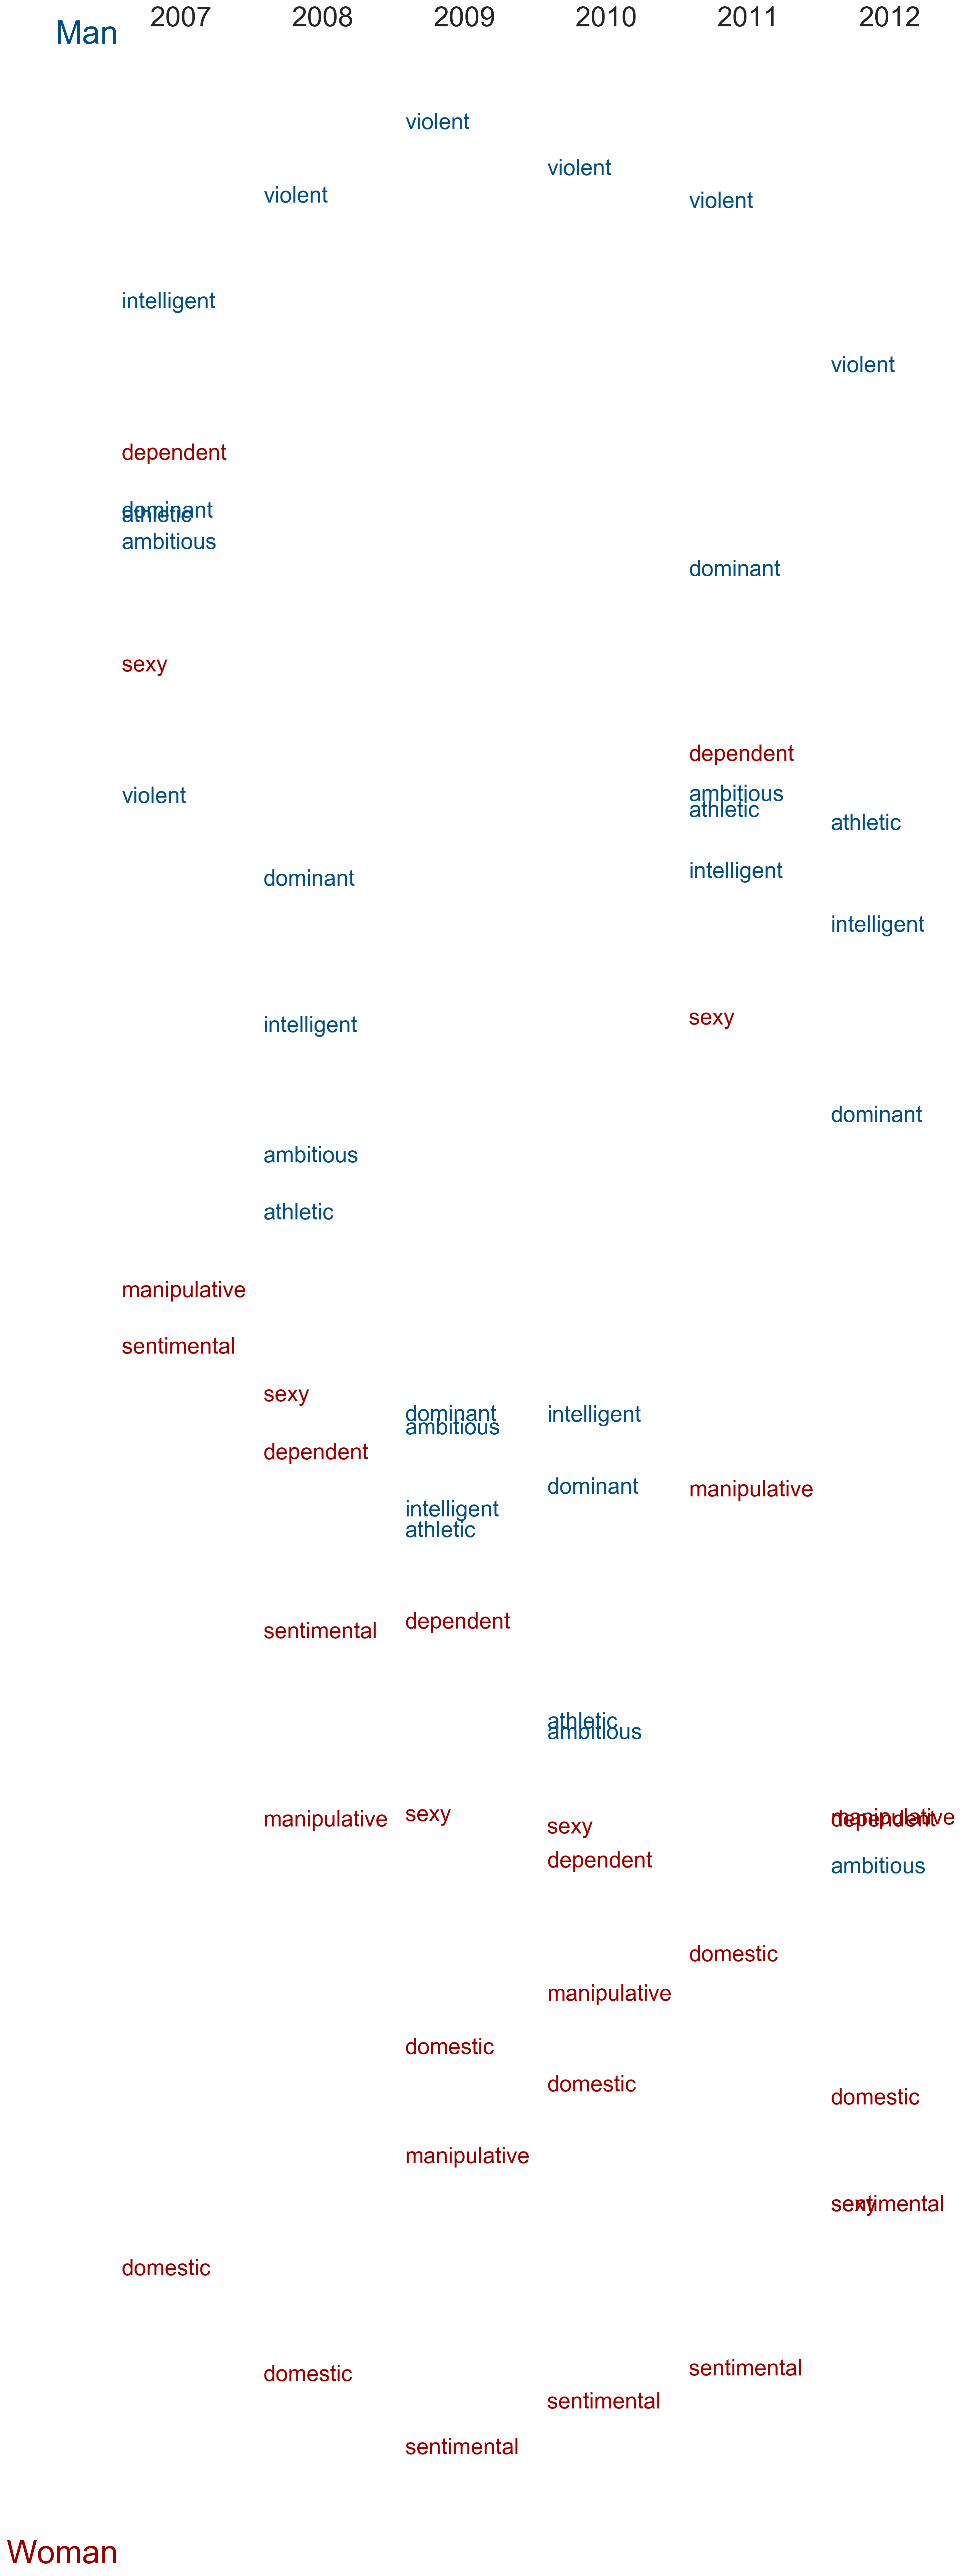

In [731]:
fig = plt.figure(figsize = (16,50), dpi=200)
ax1 = fig.add_subplot(161)
PlotFirstDimension(ax1, mas_DF, fem_DF, '2007')
ax2 = fig.add_subplot(162)
PlotDimension(ax2, mas_DF, fem_DF, '2008')
ax3 = fig.add_subplot(163)
PlotDimension(ax3, mas_DF, fem_DF, '2009')
ax4 = fig.add_subplot(164)
PlotDimension(ax4, mas_DF, fem_DF, '2010')
ax5 = fig.add_subplot(165)
PlotDimension(ax5, mas_DF, fem_DF, '2011')
ax6 = fig.add_subplot(166)
PlotDimension(ax6, mas_DF, fem_DF, '2012')
plt.show()

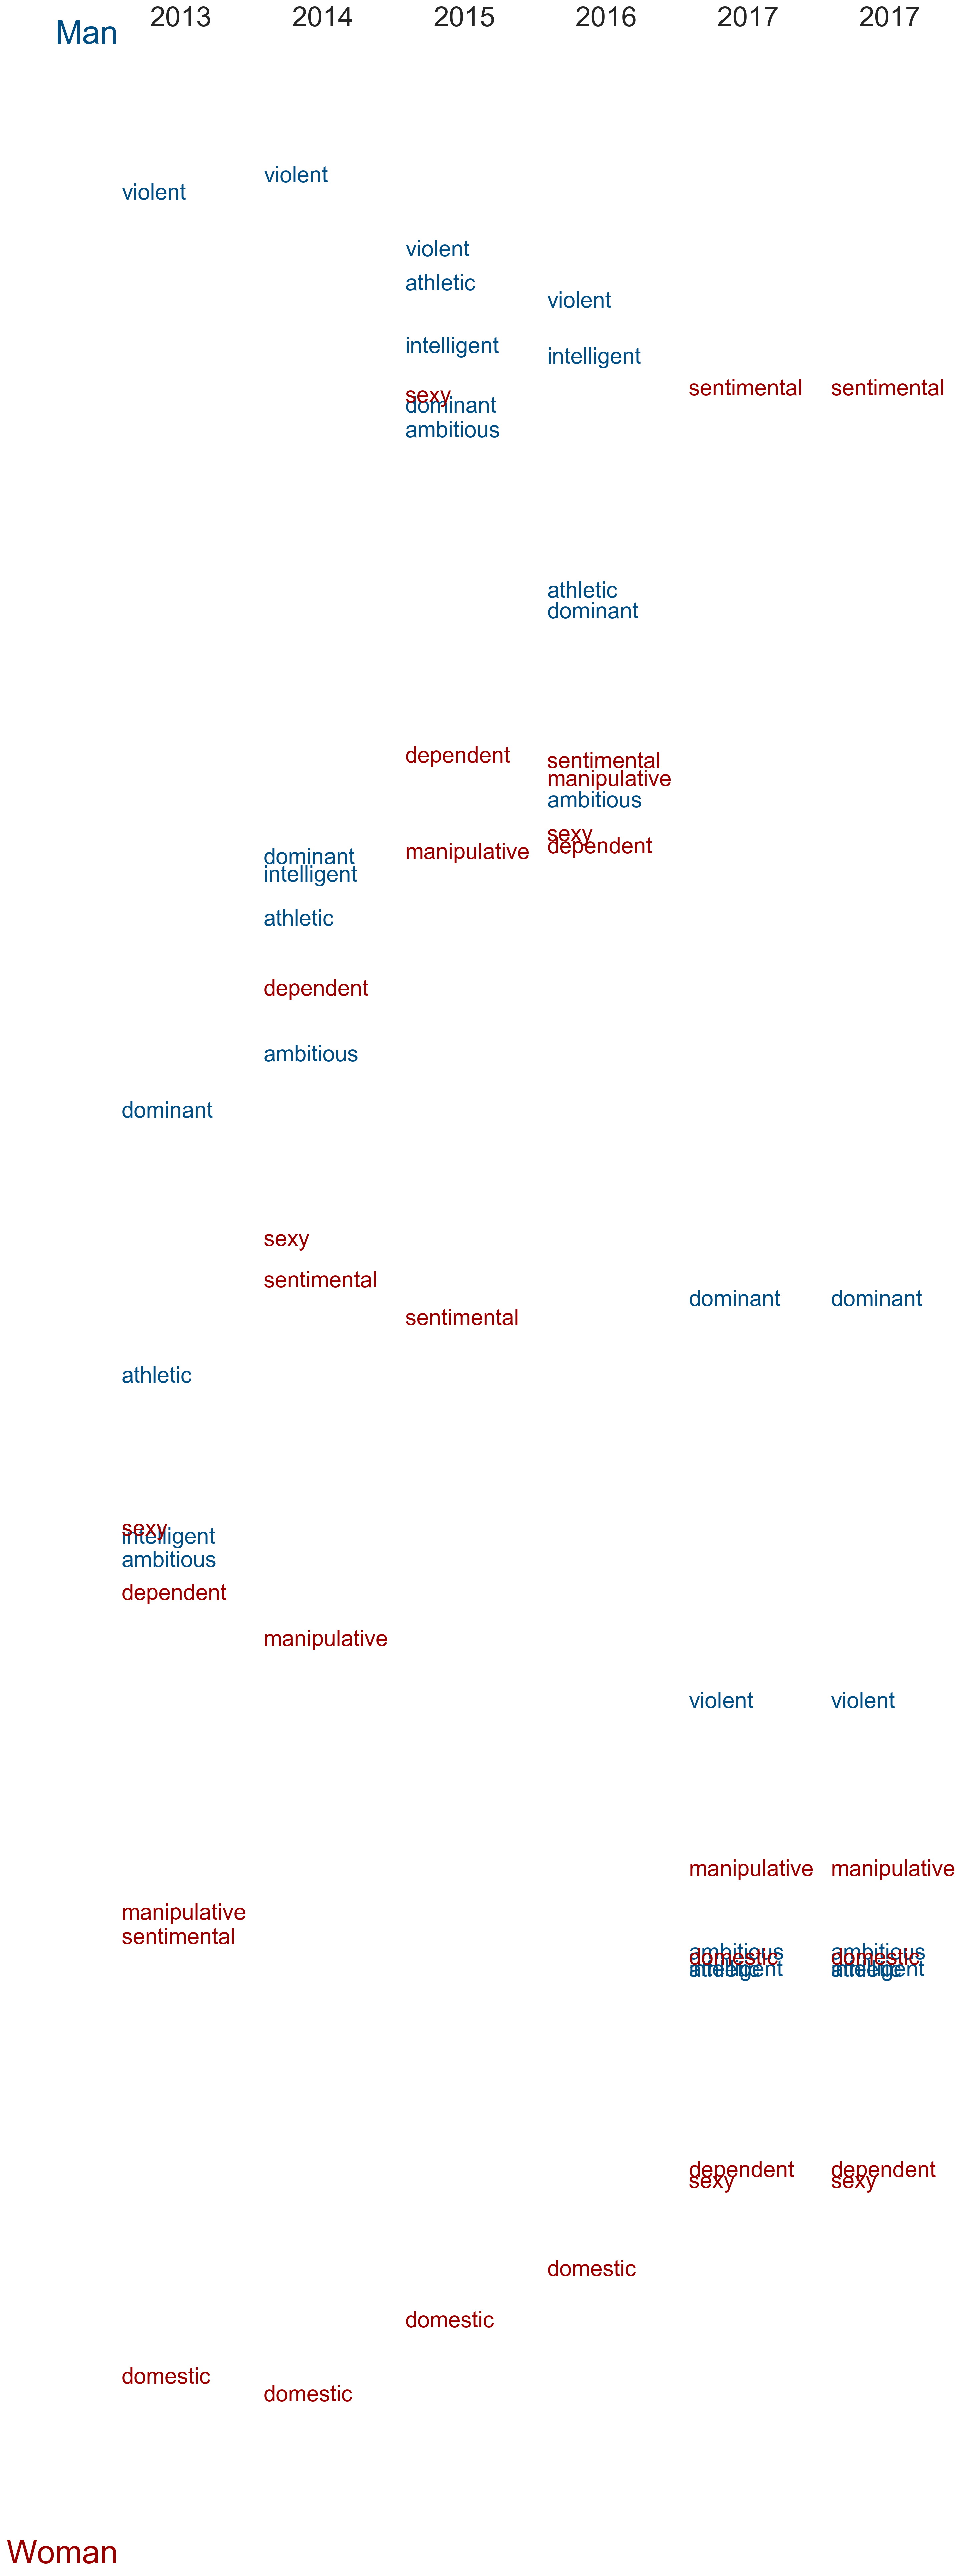

In [489]:
fig = plt.figure(figsize = (16,50), dpi=200)
ax1 = fig.add_subplot(161)
PlotFirstDimension(ax1, mas_DF, fem_DF, '2013')
ax2 = fig.add_subplot(162)
PlotDimension(ax2, mas_DF, fem_DF, '2014')
ax3 = fig.add_subplot(163)
PlotDimension(ax3, mas_DF, fem_DF, '2015')
ax4 = fig.add_subplot(164)
PlotDimension(ax4, mas_DF, fem_DF, '2016')
ax5 = fig.add_subplot(165)
PlotDimension(ax5, mas_DF, fem_DF, '2017')
ax6 = fig.add_subplot(166)
PlotDimension(ax6, mas_DF, fem_DF, '2017')
plt.show()

In [493]:
def makeDF_cks(rawEmbeddings, traits):
    df = pandas.DataFrame(index=traits.keys())
    for year, model in rawEmbeddings.items():
        cos_sim = []
        Gender = dimension(model, ['man', 'him', 'he', 'himself', 'boy', 'father', 'husband'], ['woman', 'her', 'she', 'herself', 'girl', 'mother', 'wife'])
        #print(Gender)
        for trait, trait_words in traits.items():
            cos_score = []
            for trait_word in trait_words:
                cos_score.append(sklearn.metrics.pairwise.cosine_similarity(model[trait_word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
                #print(trait_word,cos_score)
            median_cos_score = statistics.median(cos_score)
            #print(trait, median_cos_score)
            cos_sim.append(median_cos_score)
        #print(cos_sim)
        df.loc[:, str(year)] = cos_sim
    #print(df)
    df = df.reindex_axis(sorted(df.columns), axis=1)
    return df

In [697]:
mas_traits_cks = {'violent': ['kill', 'fight', 'force', 'murder', 'threaten'],\
                  'athletic': ['rush'],\
                  'dominant': ['win', 'manage', 'control', 'boss'],\
                  'ambitious': ['adventure', 'chance']}

fem_traits_cks = {'dependent': ['follow', 'wish'],\
                  'sexy': ['attractive', 'hot'],\
                  'sentimental': ['emotional', 'feel', 'care', 'love', 'understand', 'miss'],\
                  'domestic': ['family', 'parent', 'children', 'kid', 'son', 'daughter', 'baby', 'friend'],\
                  'manipulative': ['lie', 'pretend', 'abandon']}

In [698]:
mas_traits_stemmed_cks = stem_traits(mas_traits_cks)
fem_traits_stemmed_cks = stem_traits(fem_traits_cks)

In [699]:
mas_DF_cks = makeDF_cks(cks_year_rawEmbeddings, mas_traits_stemmed_cks)

In [700]:
mas_DF_cks

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
dominant,-0.027539,-0.038652,-0.018365,-0.007392,-0.027764,-0.008505,-0.018646,-0.006996,-0.012484,-0.002129,-0.004342
athletic,-0.028473,-0.039106,-0.018856,-0.008709,-0.028696,-0.010671,-0.019790,-0.007382,-0.014353,-0.003848,-0.007101
ambitious,-0.027454,-0.038348,-0.017231,-0.007317,-0.027323,-0.007855,-0.018317,-0.005613,-0.011981,-0.001477,-0.004151
violent,-0.027508,-0.038720,-0.017943,-0.007380,-0.027692,-0.008842,-0.018344,-0.006148,-0.012442,-0.001533,-0.004451


In [701]:
fem_DF_cks = makeDF_cks(cks_year_rawEmbeddings, fem_traits_stemmed_cks)

In [702]:
fem_DF_cks

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
sentimental,-0.027609,-0.038539,-0.018180,-0.007915,-0.027487,-0.008671,-0.018767,-0.006509,-0.012446,-0.002156,-0.004592
domestic,-0.027573,-0.038758,-0.018051,-0.007933,-0.027606,-0.008950,-0.018690,-0.006632,-0.012576,-0.002122,-0.004553
dependent,-0.028955,-0.038481,-0.018347,-0.007605,-0.028355,-0.009198,-0.018734,-0.006033,-0.012250,-0.002034,-0.004516
sexy,-0.031397,-0.040166,-0.020740,-0.010031,-0.031028,-0.014083,-0.020821,-0.007618,-0.015576,-0.013054,-0.007114
manipulative,-0.027753,-0.038713,-0.018488,-0.007942,-0.027755,-0.009750,-0.018749,-0.006896,-0.012805,-0.002355,-0.005409


In [712]:
def PlotFirstDimension_cks(ax, df1, df2, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 16)
    #colors = Coloring(df[dim])
    for i, trait in enumerate(df1.index):
        ax.annotate(trait, (0, df1[dim][i]), color = '#034f84', fontsize = 12)
    for i, trait in enumerate(df2.index):
        ax.annotate(trait, (0, df2[dim][i]), color = '#990000', fontsize = 12) 
    
    #MaxY = max(df1[dim].max(), df2[dim].max()) + 0.0001
    #MinY = min(df1[dim].min(), df2[dim].min()) - 0.0001
    MaxY = 0.04
    MinY = -0.04
    plt.ylim(MinY,MaxY)
    plt.yticks([MinY, MaxY])
    #plt.yticks(())
    plt.xticks(())
    ax.set_yticklabels(['Woman', 'Man'], fontsize = 18)
    [t.set_color(i) for (i,t) in
     zip(['#990000','#034f84'],ax.yaxis.get_ticklabels())]


def PlotDimension_cks(ax, df1, df2, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 16)
    #colors = Coloring(df[dim])
    for i, word in enumerate(df1.index):
        ax.annotate(word, (0, df1[dim][i]), color = '#034f84', fontsize = 12)
    for i, word in enumerate(df2.index):
        ax.annotate(word, (0, df2[dim][i]), color = '#990000', fontsize = 12) 

    #MaxY = max(df1[dim].max(), df2[dim].max()) + 0.0001
    #MinY = min(df1[dim].min(), df2[dim].min()) - 0.0001
    MaxY = 0.04
    MinY = -0.04
    plt.ylim(MinY,MaxY)
    #plt.yticks([MinY, MaxY])
    plt.yticks(())
    plt.xticks(())
    #ax.set_yticklabels(['female', 'male'], fontsize = 12)

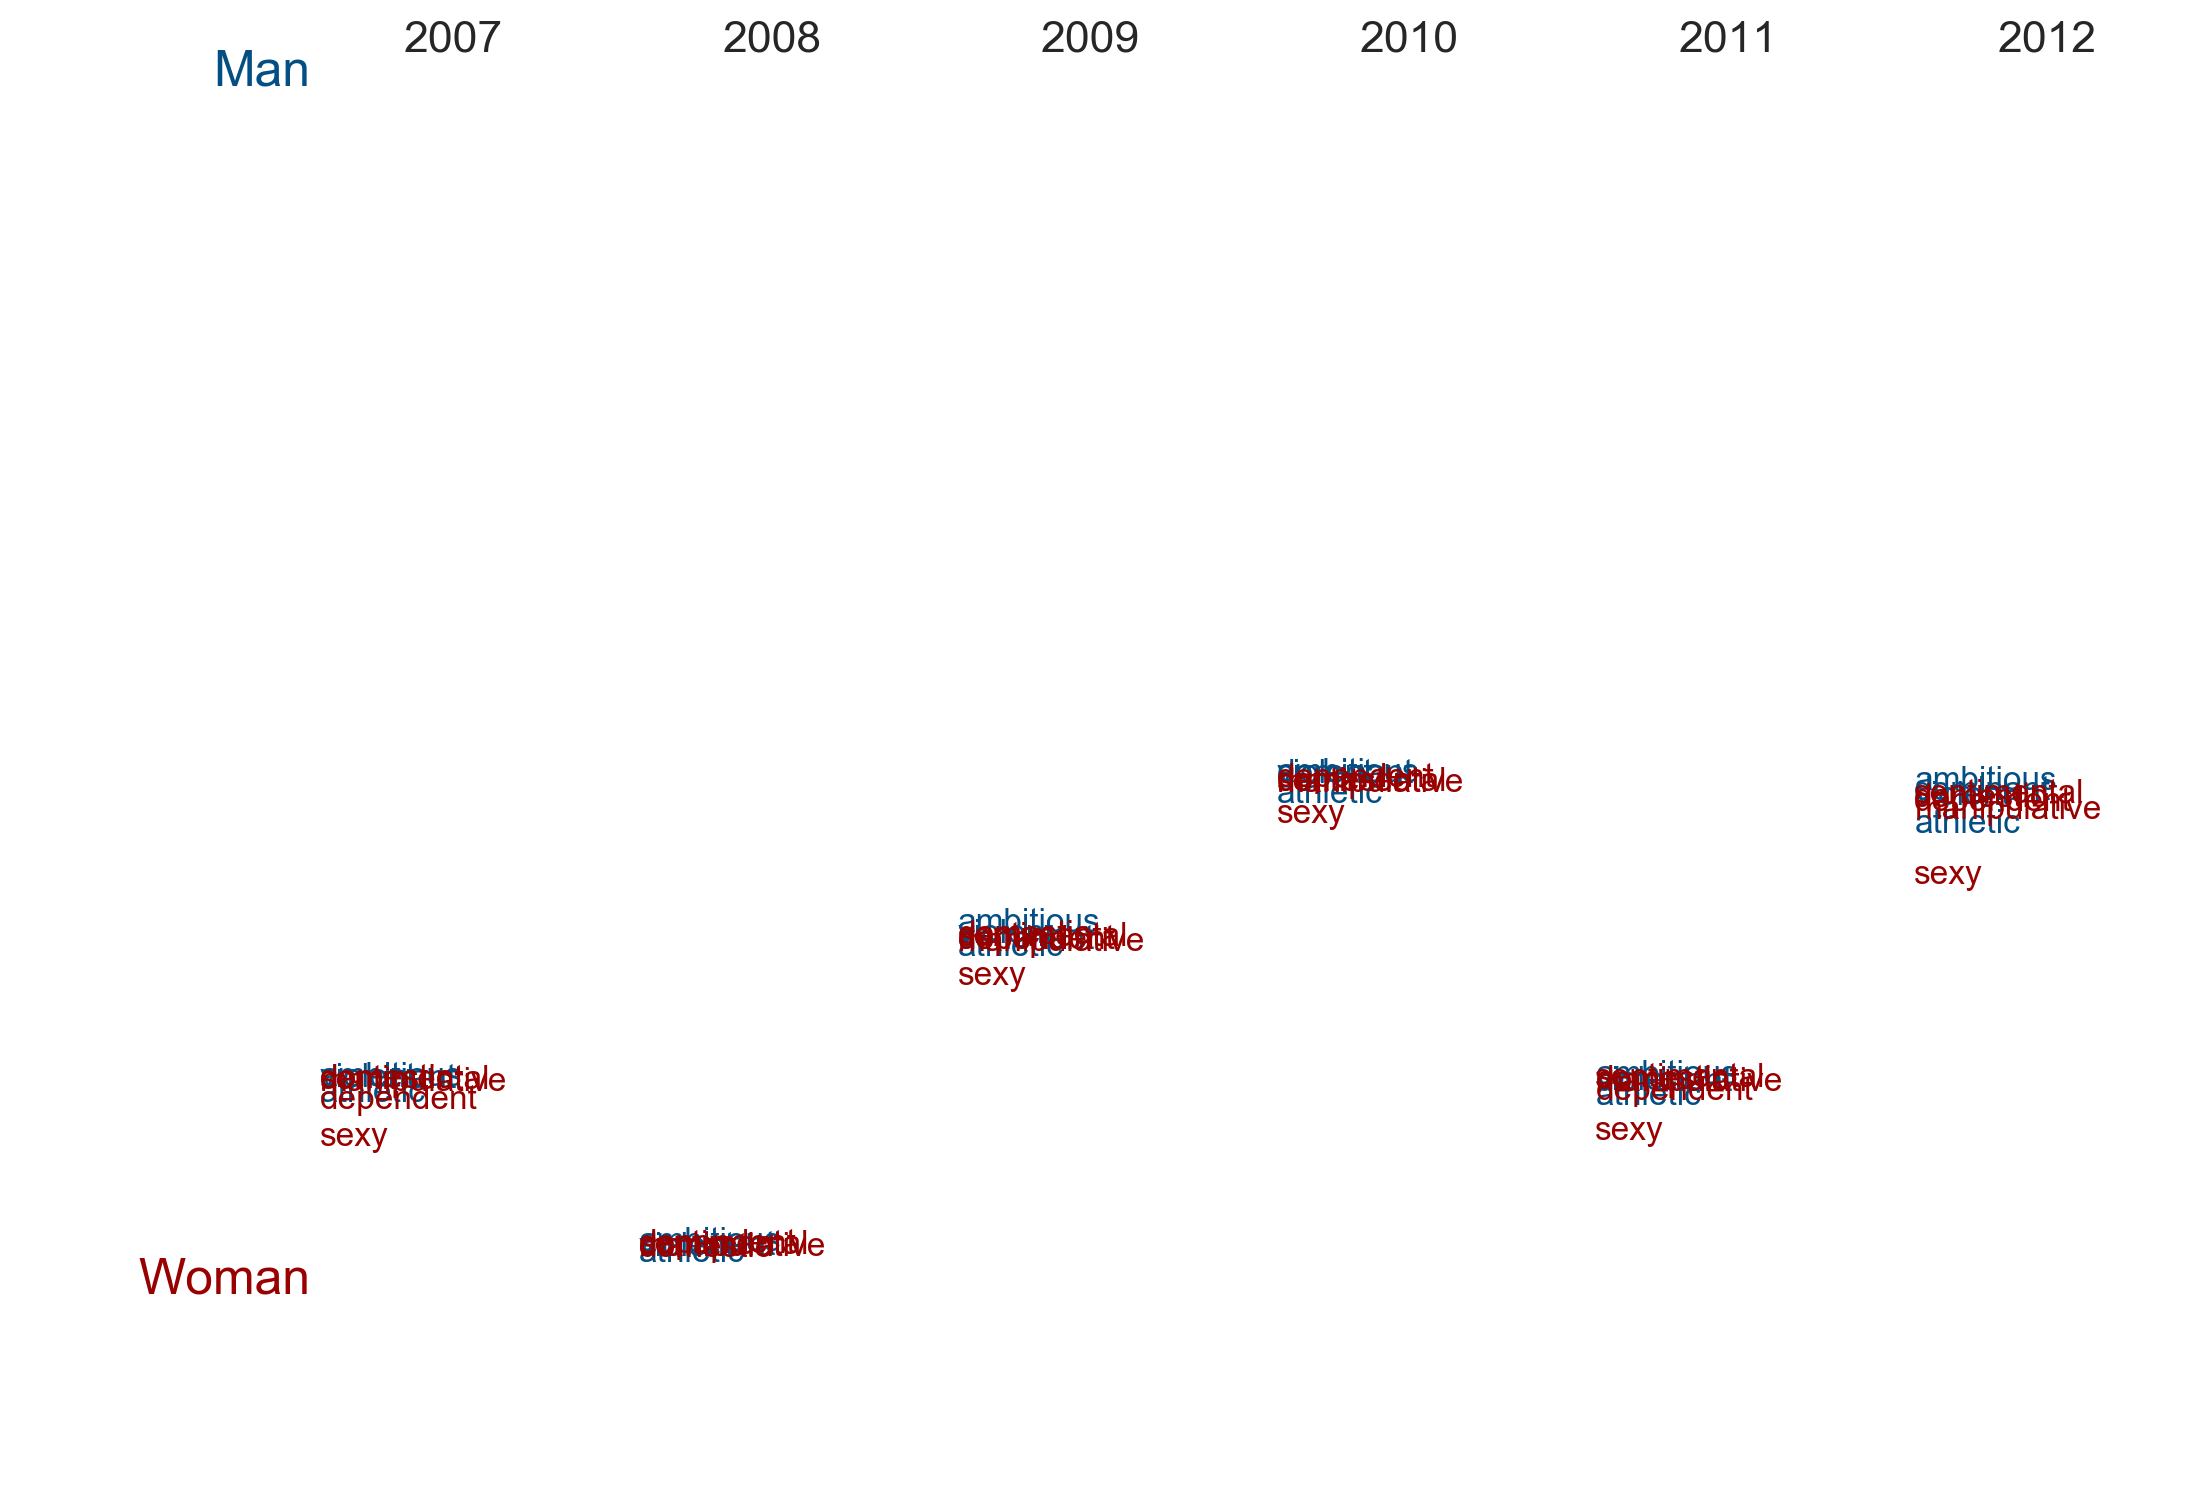

In [718]:
fig = plt.figure(figsize = (12,8), dpi = 200)
ax1 = fig.add_subplot(161)
PlotFirstDimension_cks(ax1, mas_DF_cks, fem_DF_cks, '2007')
ax2 = fig.add_subplot(162)
PlotDimension_cks(ax2, mas_DF_cks, fem_DF_cks, '2008')
ax3 = fig.add_subplot(163)
PlotDimension_cks(ax3, mas_DF_cks, fem_DF_cks, '2009')
ax4 = fig.add_subplot(164)
PlotDimension_cks(ax4, mas_DF_cks, fem_DF_cks, '2010')
ax5 = fig.add_subplot(165)
PlotDimension_cks(ax5, mas_DF_cks, fem_DF_cks, '2011')
ax6 = fig.add_subplot(166)
PlotDimension_cks(ax6, mas_DF_cks, fem_DF_cks, '2012')
plt.show()

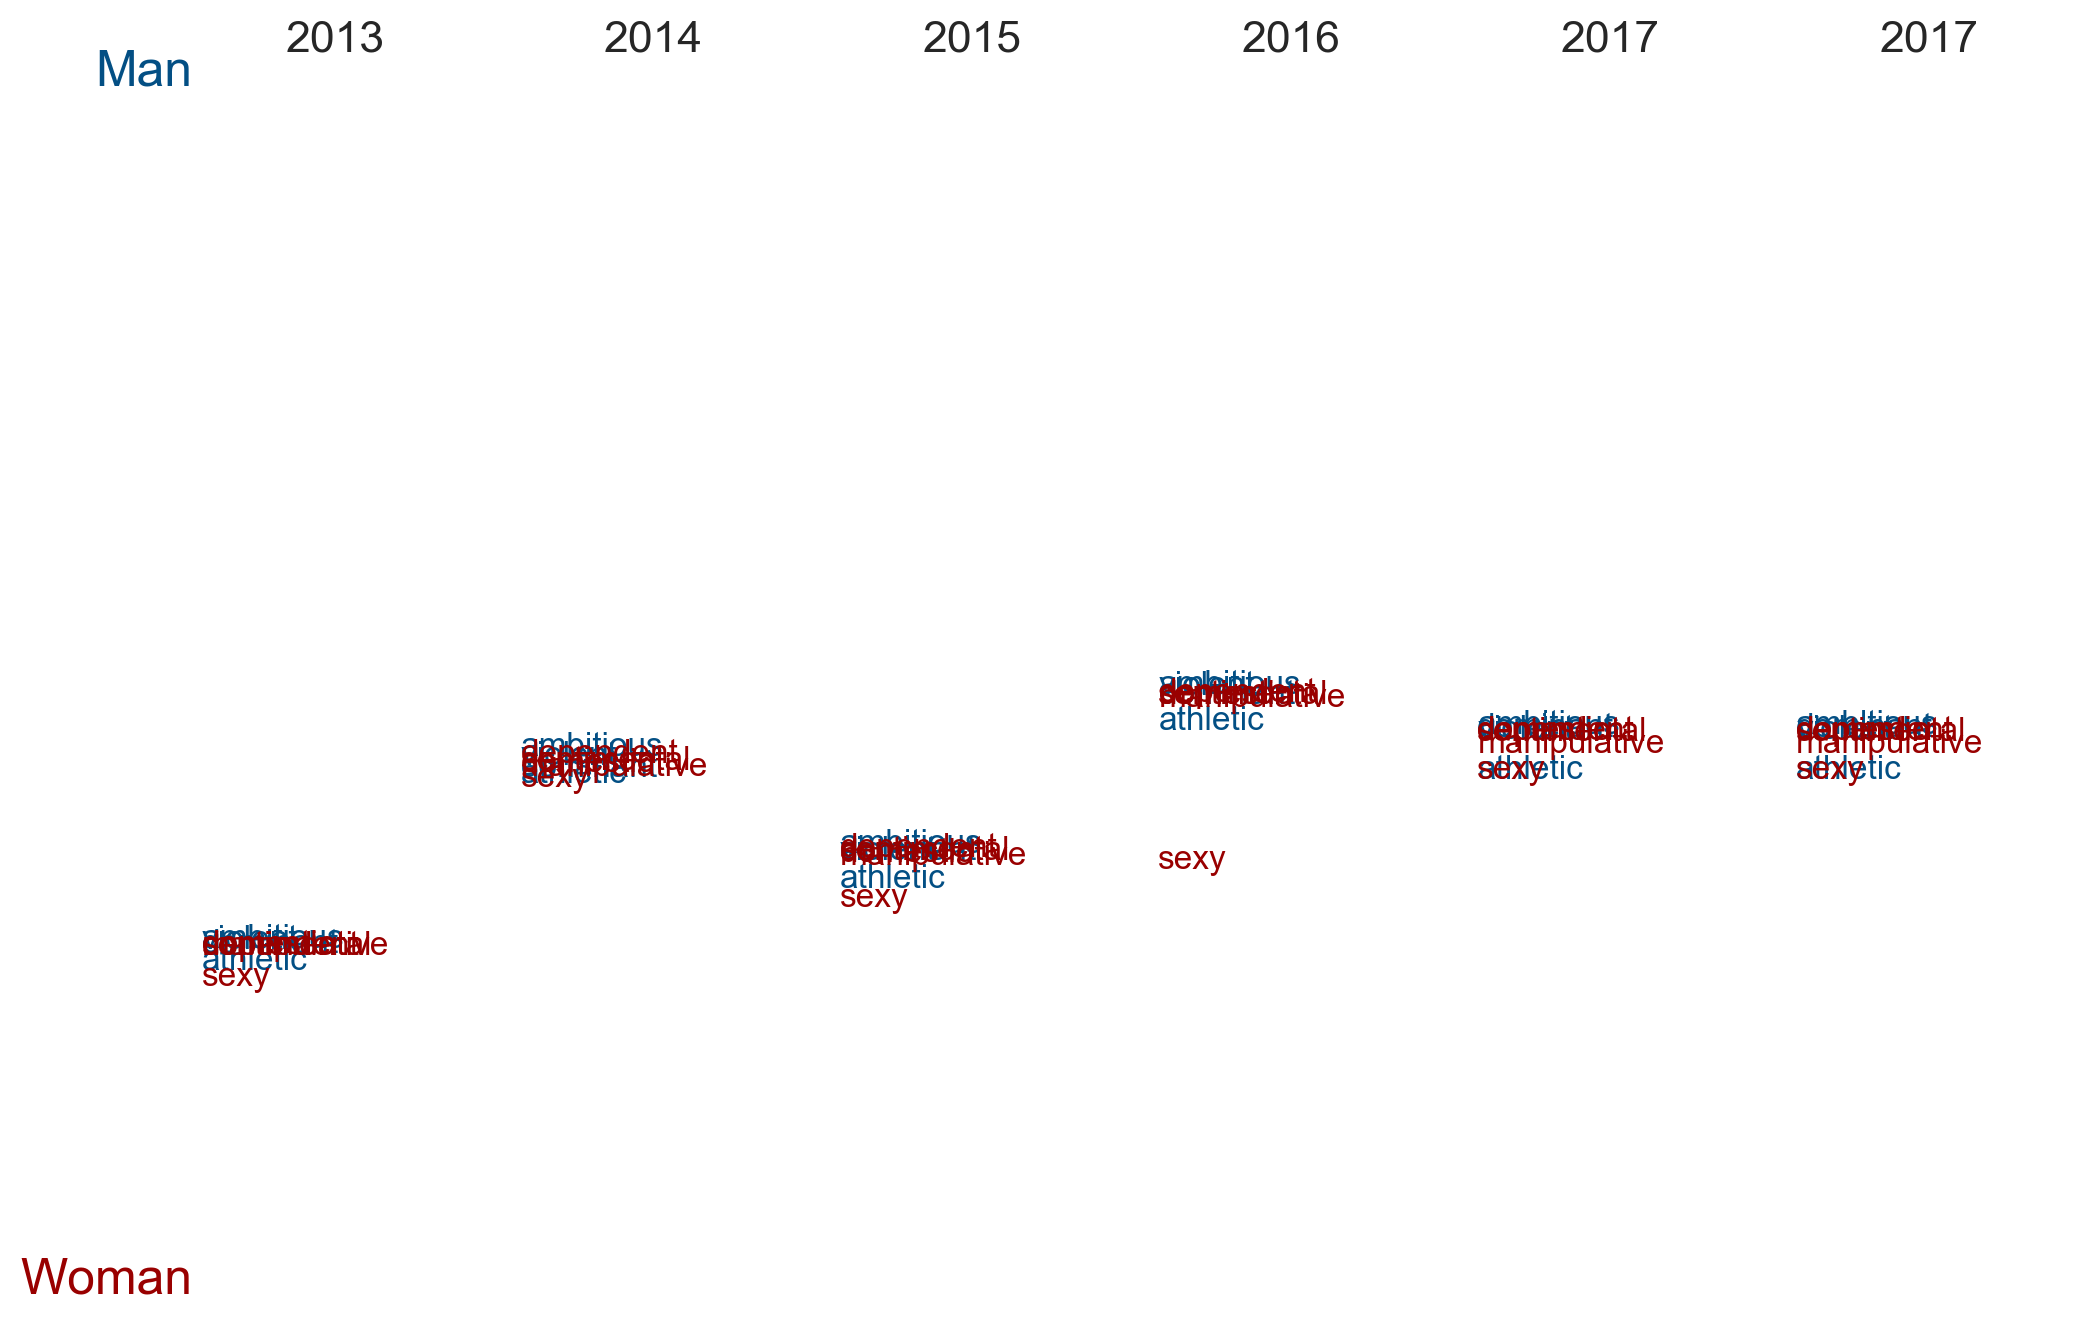

In [719]:
fig = plt.figure(figsize = (12,8), dpi = 200)
ax1 = fig.add_subplot(161)
PlotFirstDimension_cks(ax1, mas_DF_cks, fem_DF_cks, '2013')
ax2 = fig.add_subplot(162)
PlotDimension_cks(ax2, mas_DF_cks, fem_DF_cks, '2014')
ax3 = fig.add_subplot(163)
PlotDimension_cks(ax3, mas_DF_cks, fem_DF_cks, '2015')
ax4 = fig.add_subplot(164)
PlotDimension_cks(ax4, mas_DF_cks, fem_DF_cks, '2016')
ax5 = fig.add_subplot(165)
PlotDimension_cks(ax5, mas_DF_cks, fem_DF_cks, '2017')
ax6 = fig.add_subplot(166)
PlotDimension_cks(ax6, mas_DF_cks, fem_DF_cks, '2017')
plt.show()